In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'West Godavari']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop
4255,4500,16.61,81.38,West Godavari,Akividu,Akividu,Black Clay,7.66,3.71,0.67,...,274.0,2287.0,1021.0,493.53,1.70,3.14,53.18,15.10,12.62,Paddy
4256,4501,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.54,2.44,0.55,...,252.0,2272.0,1006.0,417.53,0.82,3.79,78.44,9.98,17.40,Paddy
4257,4502,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.37,3.55,0.82,...,264.0,2610.0,1028.0,543.49,1.28,3.61,87.14,16.42,29.72,Paddy
4258,4503,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.21,1.77,0.70,...,206.0,2363.0,995.0,348.31,1.78,2.79,100.70,14.76,26.42,Paddy
4259,4504,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.66,2.85,0.67,...,290.0,2177.0,1054.0,421.68,0.80,4.74,68.50,14.62,24.04,Paddy


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
count,313.000000,313.000000,313.00000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,7.047061,1.219904,0.52770,29.210224,159.092652,1400.006390,518.782748,199.571661,1.465879,2.032524,69.261086,7.465208,18.538818
std,0.851788,1.209212,0.28375,25.089836,96.045634,822.900136,400.421594,226.740241,1.860245,1.508240,60.967097,6.403115,11.707530
min,4.450000,0.010000,0.03000,1.180000,16.000000,86.000000,5.000000,0.810000,0.050000,0.130000,0.070000,0.070000,0.040000
25%,6.520000,0.110000,0.26000,11.110000,74.000000,595.000000,111.000000,6.180000,0.580000,0.560000,21.980000,1.130000,10.480000
50%,7.240000,1.050000,0.50000,21.340000,133.000000,1410.000000,517.000000,159.000000,0.980000,1.950000,52.560000,6.320000,16.240000
75%,7.650000,2.100000,0.76000,40.580000,233.000000,2216.000000,930.000000,342.750000,1.580000,3.210000,99.430000,14.180000,23.470000
max,8.700000,5.860000,1.21000,152.440000,611.000000,3969.000000,1171.000000,1505.090000,18.600000,6.440000,314.900000,20.180000,86.660000


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black Clay', 'Black Clay ', 'Clay', 'Black', 'Light Broiwn',
       'Red Sandy', 'Red Sandy Loam', 'Brown', 'Red', 'Sandy',
       'Clay Sandy', 'Black ', 'Brown Clay', 'Brown Light', 'Brown ',
       'Light Brown', 'Sandy Loam', 'Broan Clay', 'Red  Sandy',
       'Brown Dark', 'Red Sandy '], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black Clay', 'Black Clay '], 'Black Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Clay'], 'Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Black ', 'Black'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Light Broiwn ', 'Brown Light', 'Light Brown', 'Light Broiwn'], 'Light Brown Soil')
df['SoilType'] = df['SoilType'].replace(['Brown', 'Brown ', 'Brown Dark'], 'Brown Soil')
df['SoilType'] = df['SoilType'].replace(['Brown Clay', 'Broan Clay'], 'Brown Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Red Sandy', 'Red  Sandy', 'Red Sandy '], 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Red Sandy Loam', 'Red Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Clay Sandy', 'Sandy Clay Soil')
df['SoilType'] = df['SoilType'].replace('Sandy', 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Red', 'Red Soil')
df['SoilType'] = df['SoilType'].replace('Sandy Loam', 'Sandy Loam Soil')
df.SoilType.unique()

array(['Black Clay Soil', 'Clay Soil', 'Black Soil', 'Light Brown Soil',
       'Red Sandy Soil', 'Red Sandy Loam Soil', 'Brown Soil', 'Red Soil',
       'Sandy Soil', 'Sandy Clay Soil', 'Brown Clay Soil',
       'Sandy Loam Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Clay Soil': 173,
 'Black Soil': 37,
 'Brown Soil': 33,
 'Light Brown Soil': 30,
 'Red Soil': 12,
 'Red Sandy Soil': 7,
 'Red Sandy Loam Soil': 5,
 'Clay Soil': 5,
 'Brown Clay Soil': 5,
 'Sandy Loam Soil': 4,
 'Sandy Clay Soil': 1,
 'Sandy Soil': 1}

<BarContainer object of 12 artists>

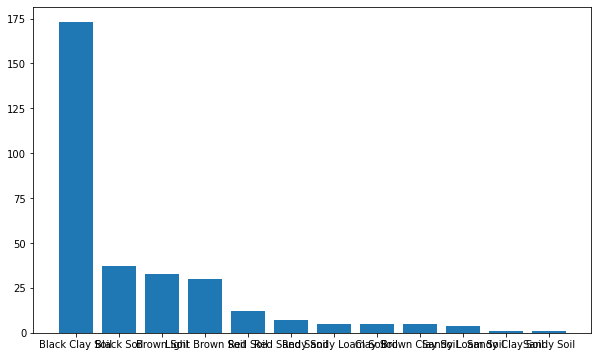

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Paddy ', 'Paddy', 'Maize', 'Groundnut', 'Cashew', 'Oil Palm',
       'Coconut+ Banana', 'Coconut', 'Lime', 'Cocoa+ Coconut',
       'Sugar Cane', 'Mulberry', 'Coconut+Cocoa', 'Cocnut+Banana',
       'Oil Palm+Coconut', 'Mulberrry', 'Coconut+ Cocoa', 'Cane+Lime ',
       'Cocnut+Lime', 'Oil Palm ', 'Tobacco', 'Cane', 'Eucalyptus',
       'Mango', 'Red Sandal', 'Oil Palm+Banana', 'Sandal', 'Cashew+Maize',
       'Banana', 'Brinjal'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy               138
Paddy                47
Maize                44
Oil Palm             37
Lime                  9
Cashew                7
Coconut               5
Cane                  3
Eucalyptus            2
Cashew+Maize          1
Tobacco               1
Mulberrry             1
Coconut+ Banana       1
Cocnut+Lime           1
Red Sandal            1
Cane+Lime             1
Oil Palm+Coconut      1
Sugar Cane            1
Mango                 1
Oil Palm+Banana       1
Coconut+ Cocoa        1
Groundnut             1
Oil Palm              1
Coconut+Cocoa         1
Cocoa+ Coconut        1
Sandal                1
Brinjal               1
Banana                1
Cocnut+Banana         1
Mulberry              1
Name: Crop, dtype: int64

Paddy                         185
OilPalm + Coconut + Banana     52
Maize                          52
SugarCane                      14
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

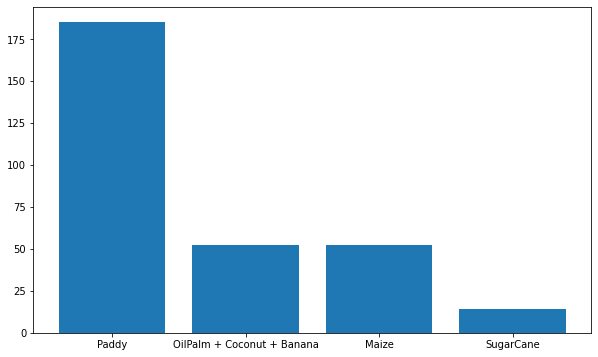

In [15]:
df['Crop'] = df['Crop'].replace(['Paddy ', 'Paddy'], 'Paddy')
df['Crop'] = df['Crop'].replace('Paady', 'Paddy')
df['Crop'] = df['Crop'].replace('Oil Palm', 'OilPalm')
df['Crop'] = df['Crop'].replace(['Coconut', 'Coconut+ Banana', 'Cocoa+ Coconut', 'Coconut+Cocoa', 'Cocnut+Banana', 'Coconut+ Cocoa', 'Cocnut+Lime'], 'Coconut')
df['Crop'] = df['Crop'].replace(['OilPalm', 'Coconut', 'Oil Palm+Coconut', 'Oil Palm ', 'Oil Palm+Banana', 'Banana'], 'OilPalm + Coconut + Banana')
df['Crop'] = df['Crop'].replace(['Cashew', 'Cashew+Maize'], 'Maize')
df['Crop'] = df['Crop'].replace(['Cane+Lime ', 'Lime', 'Cane', 'Sugar Cane'], 'SugarCane')
df = df[(df['Crop'] != 'Groundnut') & (df['Crop'] != 'Brinjal') & (df['Crop'] != 'Sandal') & (df['Crop'] != 'Red Sandal') & (df['Crop'] != 'Mango') & (df['Crop'] != 'Eucalyptus') & (df['Crop'] != 'Tobacco') & (df['Crop'] != 'Mulberrry') & (df['Crop'] != 'Mulberry')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
pH,1.000000,0.265128,-0.007376,0.071154,0.335927,0.330180,0.311368,0.195464,-0.041114,0.325979,-0.184313,0.097448,-0.326562
EC,0.265128,1.000000,0.618774,0.531399,0.609634,0.658226,0.773301,0.896447,0.309252,0.843697,0.440366,0.685738,0.032399
OC,-0.007376,0.618774,1.000000,0.692562,0.466257,0.619471,0.649804,0.618853,0.517313,0.609047,0.805941,0.809661,0.335071
P,0.071154,0.531399,0.692562,1.000000,0.508427,0.381387,0.427702,0.576944,0.414544,0.499417,0.642009,0.584928,0.186620
K,0.335927,0.609634,0.466257,0.508427,1.000000,0.577818,0.644379,0.634508,0.180731,0.694782,0.316391,0.596825,0.067216
Ca,0.330180,0.658226,0.619471,0.381387,0.577818,1.000000,0.912366,0.650816,0.121050,0.731598,0.381731,0.822074,0.084419
Mg,0.311368,0.773301,0.649804,0.427702,0.644379,0.912366,1.000000,0.705222,0.141034,0.853073,0.423422,0.889638,0.079142
S,0.195464,0.896447,0.618853,0.576944,0.634508,0.650816,0.705222,1.000000,0.314794,0.795320,0.491456,0.664093,0.102953
Zn,-0.041114,0.309252,0.517313,0.414544,0.180731,0.121050,0.141034,0.314794,1.000000,0.228145,0.496443,0.263753,0.128532
B,0.325979,0.843697,0.609047,0.499417,0.694782,0.731598,0.853073,0.795320,0.228145,1.000000,0.454374,0.744184,0.045943


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['OC', 'P', 'K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Fe', 'Cu']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'Mn', 'Crop']


In [19]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC     Mn  Black Clay Soil  Black Soil  Brown Clay Soil  \
4255  7.66  3.71  12.62                1           0                0   

      Brown Soil  Clay Soil  Light Brown Soil  Red Sandy Loam Soil  \
4255           0          0                 0                    0   

      Red Sandy Soil  Red Soil  Sandy Clay Soil  Sandy Loam Soil  Sandy Soil  
4255               0         0                0                0           0  
4255    Paddy
Name: Crop, dtype: object


In [21]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:3] = sc1.fit_transform(X[:, 0:3])

In [22]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [23]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [24]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [25]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8026315789473685


In [26]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.98 %
Standard Deviation: 5.27 %


# Decision Tree Classifier

In [27]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8026315789473685


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.07 %
Standard Deviation: 7.60 %


# Random Forest Classifier

In [31]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [32]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [33]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8289473684210527


In [34]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.13 %
Standard Deviation: 7.11 %


In [35]:
pickle.dump(clf3, open('WG_model.pkl', 'wb'))
pickle.dump(sc1, open('WG_scaler.pkl', 'wb'))

# XGBoost

In [36]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [37]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [38]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7763157894736842


In [39]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [40]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.98 %
Standard Deviation: 5.20 %


# Multi-layer Perceptron Classifier

In [41]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [42]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [43]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.9074889867841409
Testing Accuracy:  0.7894736842105263


In [44]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 88.08 %
Standard Deviation: 5.25 %


In [45]:
# pickle.dump(clf5, open('WG_model.pkl', 'wb'))
# pickle.dump(sc1, open('WG_scaler.pkl', 'wb'))

# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.5642402	total: 106ms	remaining: 10.5s
1:	learn: 0.4748144	total: 107ms	remaining: 5.24s
2:	learn: 0.4149018	total: 107ms	remaining: 3.47s
3:	learn: 0.4078797	total: 108ms	remaining: 2.59s
4:	learn: 0.3966994	total: 108ms	remaining: 2.06s
5:	learn: 0.3536222	total: 110ms	remaining: 1.72s
6:	learn: 0.3343769	total: 111ms	remaining: 1.47s
7:	learn: 0.3323360	total: 111ms	remaining: 1.28s
8:	learn: 0.3222810	total: 112ms	remaining: 1.13s
9:	learn: 0.3108441	total: 112ms	remaining: 1.01s
10:	learn: 0.3011107	total: 113ms	remaining: 911ms
11:	learn: 0.2930370	total: 113ms	remaining: 829ms
12:	learn: 0.2831532	total: 113ms	remaining: 759ms
13:	learn: 0.2812729	total: 114ms	remaining: 699ms
14:	learn: 0.2765490	total: 114ms	remaining: 648ms
15:	learn: 0.2634654	total: 115ms	remaining: 602ms
16:	learn: 0.2602696	total: 115ms	remaining: 562ms
17:	learn: 0.2564392	total: 116ms	remaining: 526ms
18:	learn: 0.2531635	total: 116ms	remaining: 494ms
19:	learn: 0.2475110	total: 117ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5164756698
bestIteration = 99

Training on fold [1/5]

bestTest = 0.4445836707
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5317352543
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4853893297
bestIteration = 99

Training on fold [4/5]

bestTest = 0.4131492387
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3383548	test: 1.3379482	best: 1.3379482 (0)	total: 1.58ms	remaining: 1.58s
1:	learn: 1.3008182	test: 1.3019537	best: 1.3019537 (1)	total: 3.04ms	remaining: 1.52s
2:	learn: 1.2610844	test: 1.2614155	best: 1.2614155 (2)	total: 4.34ms	remaining: 1.44s
3:	learn: 1.2237878	test: 1.2220611	best: 1.2220611 (3)	total: 5.68ms	remaining: 1.41s
4:	learn: 1.1877383	test: 1.1849552	best: 1.1849552 (4)	total: 7.94ms	remaining: 1.58s
5:	learn: 1.1572575	test: 1.1542404	best: 1.1542404 (5)	total: 9.14ms	remaining: 1.51s
6:	learn: 1.1259922	test: 1.1206323	best: 1.1206323 (6)	total: 9.74ms	remaining: 1.38s
7:	learn: 1.0983492	test: 1.0932453	best: 1.0932453 (7)	total: 10.9ms	remaining: 1.36s
8:	learn: 1.0693809	test: 1.0625976	best: 1.0625976 (8)	total: 12.2ms	remaining: 1.35s
9:	learn: 1.0402858	test: 1.0339170	best: 1.0339170 (9)	total: 13.4ms	remaining: 1.32s
10:	learn: 1.0179353	test: 1.0127783	best: 1.0127783 (10)	total: 14.6ms	remaining: 1.31s
11:	learn: 0.9964582	test: 0.9913036	best

119:	learn: 0.3938670	test: 0.4041280	best: 0.4041280 (119)	total: 174ms	remaining: 1.27s
120:	learn: 0.3929516	test: 0.4036888	best: 0.4036888 (120)	total: 175ms	remaining: 1.27s
121:	learn: 0.3915825	test: 0.4023742	best: 0.4023742 (121)	total: 177ms	remaining: 1.27s
122:	learn: 0.3899869	test: 0.4012492	best: 0.4012492 (122)	total: 178ms	remaining: 1.27s
123:	learn: 0.3887316	test: 0.4008186	best: 0.4008186 (123)	total: 179ms	remaining: 1.27s
124:	learn: 0.3874027	test: 0.3999841	best: 0.3999841 (124)	total: 181ms	remaining: 1.26s
125:	learn: 0.3859649	test: 0.3992695	best: 0.3992695 (125)	total: 182ms	remaining: 1.26s
126:	learn: 0.3855195	test: 0.3989049	best: 0.3989049 (126)	total: 184ms	remaining: 1.26s
127:	learn: 0.3844253	test: 0.3984317	best: 0.3984317 (127)	total: 185ms	remaining: 1.26s
128:	learn: 0.3831590	test: 0.3973978	best: 0.3973978 (128)	total: 186ms	remaining: 1.26s
129:	learn: 0.3821807	test: 0.3969708	best: 0.3969708 (129)	total: 188ms	remaining: 1.25s
130:	learn

241:	learn: 0.2903401	test: 0.3560704	best: 0.3551011 (237)	total: 347ms	remaining: 1.08s
242:	learn: 0.2897278	test: 0.3564177	best: 0.3551011 (237)	total: 348ms	remaining: 1.08s
243:	learn: 0.2890585	test: 0.3565537	best: 0.3551011 (237)	total: 349ms	remaining: 1.08s
244:	learn: 0.2885074	test: 0.3563843	best: 0.3551011 (237)	total: 350ms	remaining: 1.08s
245:	learn: 0.2878502	test: 0.3566097	best: 0.3551011 (237)	total: 352ms	remaining: 1.08s
246:	learn: 0.2875946	test: 0.3566941	best: 0.3551011 (237)	total: 353ms	remaining: 1.08s
247:	learn: 0.2870901	test: 0.3561402	best: 0.3551011 (237)	total: 355ms	remaining: 1.07s
248:	learn: 0.2859796	test: 0.3562917	best: 0.3551011 (237)	total: 358ms	remaining: 1.08s
249:	learn: 0.2855936	test: 0.3559717	best: 0.3551011 (237)	total: 360ms	remaining: 1.08s
250:	learn: 0.2853128	test: 0.3559572	best: 0.3551011 (237)	total: 361ms	remaining: 1.08s
251:	learn: 0.2847547	test: 0.3562606	best: 0.3551011 (237)	total: 363ms	remaining: 1.08s
252:	learn

352:	learn: 0.2341860	test: 0.3524440	best: 0.3505336 (312)	total: 512ms	remaining: 938ms
353:	learn: 0.2340248	test: 0.3523830	best: 0.3505336 (312)	total: 513ms	remaining: 937ms
354:	learn: 0.2335959	test: 0.3521313	best: 0.3505336 (312)	total: 515ms	remaining: 935ms
355:	learn: 0.2332993	test: 0.3524829	best: 0.3505336 (312)	total: 516ms	remaining: 934ms
356:	learn: 0.2330818	test: 0.3526422	best: 0.3505336 (312)	total: 518ms	remaining: 932ms
357:	learn: 0.2325202	test: 0.3523620	best: 0.3505336 (312)	total: 519ms	remaining: 931ms
358:	learn: 0.2319637	test: 0.3525799	best: 0.3505336 (312)	total: 520ms	remaining: 929ms
359:	learn: 0.2316744	test: 0.3526937	best: 0.3505336 (312)	total: 522ms	remaining: 928ms
360:	learn: 0.2314239	test: 0.3529952	best: 0.3505336 (312)	total: 523ms	remaining: 926ms
361:	learn: 0.2309541	test: 0.3530502	best: 0.3505336 (312)	total: 524ms	remaining: 924ms
362:	learn: 0.2305590	test: 0.3530995	best: 0.3505336 (312)	total: 526ms	remaining: 922ms
363:	learn

485:	learn: 0.1923558	test: 0.3552766	best: 0.3505336 (312)	total: 690ms	remaining: 730ms
486:	learn: 0.1922838	test: 0.3552757	best: 0.3505336 (312)	total: 692ms	remaining: 729ms
487:	learn: 0.1920290	test: 0.3550945	best: 0.3505336 (312)	total: 694ms	remaining: 728ms
488:	learn: 0.1916033	test: 0.3557577	best: 0.3505336 (312)	total: 695ms	remaining: 726ms
489:	learn: 0.1914066	test: 0.3559412	best: 0.3505336 (312)	total: 696ms	remaining: 725ms
490:	learn: 0.1910720	test: 0.3564738	best: 0.3505336 (312)	total: 698ms	remaining: 723ms
491:	learn: 0.1907339	test: 0.3567730	best: 0.3505336 (312)	total: 699ms	remaining: 722ms
492:	learn: 0.1905786	test: 0.3569119	best: 0.3505336 (312)	total: 700ms	remaining: 720ms
493:	learn: 0.1903253	test: 0.3568448	best: 0.3505336 (312)	total: 702ms	remaining: 719ms
494:	learn: 0.1901228	test: 0.3567939	best: 0.3505336 (312)	total: 703ms	remaining: 717ms
495:	learn: 0.1898507	test: 0.3568167	best: 0.3505336 (312)	total: 704ms	remaining: 716ms
496:	learn

616:	learn: 0.1616082	test: 0.3647575	best: 0.3505336 (312)	total: 859ms	remaining: 533ms
617:	learn: 0.1614819	test: 0.3648674	best: 0.3505336 (312)	total: 861ms	remaining: 532ms
618:	learn: 0.1612802	test: 0.3648504	best: 0.3505336 (312)	total: 862ms	remaining: 531ms
619:	learn: 0.1610364	test: 0.3650106	best: 0.3505336 (312)	total: 864ms	remaining: 530ms
620:	learn: 0.1608160	test: 0.3650660	best: 0.3505336 (312)	total: 865ms	remaining: 528ms
621:	learn: 0.1605676	test: 0.3653360	best: 0.3505336 (312)	total: 867ms	remaining: 527ms
622:	learn: 0.1603124	test: 0.3653306	best: 0.3505336 (312)	total: 868ms	remaining: 525ms
623:	learn: 0.1600885	test: 0.3654551	best: 0.3505336 (312)	total: 869ms	remaining: 524ms
624:	learn: 0.1599151	test: 0.3653964	best: 0.3505336 (312)	total: 870ms	remaining: 522ms
625:	learn: 0.1596773	test: 0.3656560	best: 0.3505336 (312)	total: 872ms	remaining: 521ms
626:	learn: 0.1594406	test: 0.3656328	best: 0.3505336 (312)	total: 873ms	remaining: 519ms
627:	learn

746:	learn: 0.1373429	test: 0.3722001	best: 0.3505336 (312)	total: 1.04s	remaining: 351ms
747:	learn: 0.1371191	test: 0.3722905	best: 0.3505336 (312)	total: 1.04s	remaining: 350ms
748:	learn: 0.1369215	test: 0.3725763	best: 0.3505336 (312)	total: 1.04s	remaining: 348ms
749:	learn: 0.1368705	test: 0.3726032	best: 0.3505336 (312)	total: 1.04s	remaining: 347ms
750:	learn: 0.1367980	test: 0.3727118	best: 0.3505336 (312)	total: 1.04s	remaining: 346ms
751:	learn: 0.1365815	test: 0.3725038	best: 0.3505336 (312)	total: 1.04s	remaining: 344ms
752:	learn: 0.1364514	test: 0.3724788	best: 0.3505336 (312)	total: 1.04s	remaining: 343ms
753:	learn: 0.1362798	test: 0.3727701	best: 0.3505336 (312)	total: 1.05s	remaining: 342ms
754:	learn: 0.1360418	test: 0.3724527	best: 0.3505336 (312)	total: 1.05s	remaining: 340ms
755:	learn: 0.1359171	test: 0.3727391	best: 0.3505336 (312)	total: 1.05s	remaining: 339ms
756:	learn: 0.1357452	test: 0.3728472	best: 0.3505336 (312)	total: 1.05s	remaining: 337ms
757:	learn

875:	learn: 0.1188869	test: 0.3816139	best: 0.3505336 (312)	total: 1.21s	remaining: 171ms
876:	learn: 0.1187979	test: 0.3817027	best: 0.3505336 (312)	total: 1.21s	remaining: 169ms
877:	learn: 0.1187222	test: 0.3817522	best: 0.3505336 (312)	total: 1.21s	remaining: 168ms
878:	learn: 0.1185173	test: 0.3819210	best: 0.3505336 (312)	total: 1.21s	remaining: 166ms
879:	learn: 0.1183107	test: 0.3824256	best: 0.3505336 (312)	total: 1.21s	remaining: 165ms
880:	learn: 0.1182044	test: 0.3825519	best: 0.3505336 (312)	total: 1.21s	remaining: 164ms
881:	learn: 0.1180790	test: 0.3826012	best: 0.3505336 (312)	total: 1.21s	remaining: 162ms
882:	learn: 0.1180097	test: 0.3826562	best: 0.3505336 (312)	total: 1.21s	remaining: 161ms
883:	learn: 0.1179526	test: 0.3826185	best: 0.3505336 (312)	total: 1.22s	remaining: 160ms
884:	learn: 0.1178412	test: 0.3825068	best: 0.3505336 (312)	total: 1.22s	remaining: 158ms
885:	learn: 0.1176965	test: 0.3825729	best: 0.3505336 (312)	total: 1.22s	remaining: 157ms
886:	learn

0:	learn: 1.2313808	test: 1.2299253	best: 1.2299253 (0)	total: 1.7ms	remaining: 1.7s
1:	learn: 1.1302635	test: 1.1326764	best: 1.1326764 (1)	total: 3.26ms	remaining: 1.63s
2:	learn: 1.0357025	test: 1.0352378	best: 1.0352378 (2)	total: 4.59ms	remaining: 1.52s
3:	learn: 0.9531240	test: 0.9505550	best: 0.9505550 (3)	total: 5.93ms	remaining: 1.48s
4:	learn: 0.9012076	test: 0.8934120	best: 0.8934120 (4)	total: 7.25ms	remaining: 1.44s
5:	learn: 0.8535563	test: 0.8448010	best: 0.8448010 (5)	total: 8.53ms	remaining: 1.41s
6:	learn: 0.8045644	test: 0.7947858	best: 0.7947858 (6)	total: 9.86ms	remaining: 1.4s
7:	learn: 0.7641473	test: 0.7553601	best: 0.7553601 (7)	total: 11.5ms	remaining: 1.42s
8:	learn: 0.7287599	test: 0.7215858	best: 0.7215858 (8)	total: 13.5ms	remaining: 1.49s
9:	learn: 0.6970864	test: 0.6932029	best: 0.6932029 (9)	total: 14.8ms	remaining: 1.47s
10:	learn: 0.6668841	test: 0.6627666	best: 0.6627666 (10)	total: 16ms	remaining: 1.44s
11:	learn: 0.6445252	test: 0.6371498	best: 0.6

108:	learn: 0.2274116	test: 0.3720193	best: 0.3579899 (61)	total: 168ms	remaining: 1.38s
109:	learn: 0.2263143	test: 0.3717142	best: 0.3579899 (61)	total: 170ms	remaining: 1.37s
110:	learn: 0.2239904	test: 0.3707813	best: 0.3579899 (61)	total: 171ms	remaining: 1.37s
111:	learn: 0.2226618	test: 0.3703574	best: 0.3579899 (61)	total: 172ms	remaining: 1.37s
112:	learn: 0.2217251	test: 0.3701023	best: 0.3579899 (61)	total: 174ms	remaining: 1.36s
113:	learn: 0.2199680	test: 0.3704994	best: 0.3579899 (61)	total: 175ms	remaining: 1.36s
114:	learn: 0.2187385	test: 0.3701613	best: 0.3579899 (61)	total: 176ms	remaining: 1.36s
115:	learn: 0.2160677	test: 0.3678579	best: 0.3579899 (61)	total: 179ms	remaining: 1.36s
116:	learn: 0.2144540	test: 0.3699128	best: 0.3579899 (61)	total: 181ms	remaining: 1.37s
117:	learn: 0.2133917	test: 0.3707319	best: 0.3579899 (61)	total: 183ms	remaining: 1.36s
118:	learn: 0.2118519	test: 0.3697583	best: 0.3579899 (61)	total: 184ms	remaining: 1.36s
119:	learn: 0.2114333

203:	learn: 0.1450201	test: 0.3841934	best: 0.3579899 (61)	total: 338ms	remaining: 1.32s
204:	learn: 0.1442039	test: 0.3858237	best: 0.3579899 (61)	total: 339ms	remaining: 1.31s
205:	learn: 0.1436319	test: 0.3858838	best: 0.3579899 (61)	total: 341ms	remaining: 1.31s
206:	learn: 0.1434088	test: 0.3862789	best: 0.3579899 (61)	total: 342ms	remaining: 1.31s
207:	learn: 0.1429322	test: 0.3865993	best: 0.3579899 (61)	total: 343ms	remaining: 1.31s
208:	learn: 0.1418964	test: 0.3877656	best: 0.3579899 (61)	total: 345ms	remaining: 1.3s
209:	learn: 0.1413902	test: 0.3876686	best: 0.3579899 (61)	total: 346ms	remaining: 1.3s
210:	learn: 0.1407758	test: 0.3874717	best: 0.3579899 (61)	total: 348ms	remaining: 1.3s
211:	learn: 0.1405793	test: 0.3873351	best: 0.3579899 (61)	total: 349ms	remaining: 1.3s
212:	learn: 0.1403842	test: 0.3875801	best: 0.3579899 (61)	total: 351ms	remaining: 1.3s
213:	learn: 0.1400200	test: 0.3876619	best: 0.3579899 (61)	total: 353ms	remaining: 1.29s
214:	learn: 0.1395782	test

332:	learn: 0.0925370	test: 0.4179477	best: 0.3579899 (61)	total: 514ms	remaining: 1.03s
333:	learn: 0.0923173	test: 0.4175795	best: 0.3579899 (61)	total: 515ms	remaining: 1.03s
334:	learn: 0.0920685	test: 0.4182085	best: 0.3579899 (61)	total: 516ms	remaining: 1.02s
335:	learn: 0.0917244	test: 0.4181582	best: 0.3579899 (61)	total: 518ms	remaining: 1.02s
336:	learn: 0.0915650	test: 0.4187448	best: 0.3579899 (61)	total: 519ms	remaining: 1.02s
337:	learn: 0.0913838	test: 0.4188490	best: 0.3579899 (61)	total: 520ms	remaining: 1.02s
338:	learn: 0.0910922	test: 0.4185459	best: 0.3579899 (61)	total: 521ms	remaining: 1.02s
339:	learn: 0.0908903	test: 0.4190605	best: 0.3579899 (61)	total: 523ms	remaining: 1.01s
340:	learn: 0.0906411	test: 0.4192486	best: 0.3579899 (61)	total: 524ms	remaining: 1.01s
341:	learn: 0.0904433	test: 0.4194101	best: 0.3579899 (61)	total: 525ms	remaining: 1.01s
342:	learn: 0.0900822	test: 0.4193661	best: 0.3579899 (61)	total: 527ms	remaining: 1.01s
343:	learn: 0.0897800

454:	learn: 0.0662535	test: 0.4458660	best: 0.3579899 (61)	total: 682ms	remaining: 817ms
455:	learn: 0.0660875	test: 0.4464247	best: 0.3579899 (61)	total: 684ms	remaining: 816ms
456:	learn: 0.0659288	test: 0.4459123	best: 0.3579899 (61)	total: 686ms	remaining: 815ms
457:	learn: 0.0657324	test: 0.4466934	best: 0.3579899 (61)	total: 688ms	remaining: 814ms
458:	learn: 0.0656143	test: 0.4471467	best: 0.3579899 (61)	total: 690ms	remaining: 813ms
459:	learn: 0.0655576	test: 0.4471732	best: 0.3579899 (61)	total: 691ms	remaining: 811ms
460:	learn: 0.0653753	test: 0.4472112	best: 0.3579899 (61)	total: 692ms	remaining: 809ms
461:	learn: 0.0652960	test: 0.4473778	best: 0.3579899 (61)	total: 693ms	remaining: 808ms
462:	learn: 0.0652462	test: 0.4472373	best: 0.3579899 (61)	total: 695ms	remaining: 806ms
463:	learn: 0.0651154	test: 0.4476556	best: 0.3579899 (61)	total: 696ms	remaining: 804ms
464:	learn: 0.0650017	test: 0.4481531	best: 0.3579899 (61)	total: 697ms	remaining: 802ms
465:	learn: 0.0647823

562:	learn: 0.0523830	test: 0.4726560	best: 0.3579899 (61)	total: 854ms	remaining: 663ms
563:	learn: 0.0523284	test: 0.4729520	best: 0.3579899 (61)	total: 856ms	remaining: 661ms
564:	learn: 0.0522506	test: 0.4734249	best: 0.3579899 (61)	total: 857ms	remaining: 660ms
565:	learn: 0.0521893	test: 0.4737999	best: 0.3579899 (61)	total: 859ms	remaining: 658ms
566:	learn: 0.0521169	test: 0.4742067	best: 0.3579899 (61)	total: 860ms	remaining: 657ms
567:	learn: 0.0518992	test: 0.4738328	best: 0.3579899 (61)	total: 861ms	remaining: 655ms
568:	learn: 0.0517717	test: 0.4737712	best: 0.3579899 (61)	total: 863ms	remaining: 654ms
569:	learn: 0.0516223	test: 0.4740717	best: 0.3579899 (61)	total: 864ms	remaining: 652ms
570:	learn: 0.0515128	test: 0.4745037	best: 0.3579899 (61)	total: 867ms	remaining: 651ms
571:	learn: 0.0514524	test: 0.4747477	best: 0.3579899 (61)	total: 869ms	remaining: 650ms
572:	learn: 0.0513898	test: 0.4747377	best: 0.3579899 (61)	total: 870ms	remaining: 648ms
573:	learn: 0.0512123

686:	learn: 0.0414017	test: 0.4916440	best: 0.3579899 (61)	total: 1.03s	remaining: 468ms
687:	learn: 0.0413553	test: 0.4919635	best: 0.3579899 (61)	total: 1.03s	remaining: 466ms
688:	learn: 0.0413157	test: 0.4922597	best: 0.3579899 (61)	total: 1.03s	remaining: 465ms
689:	learn: 0.0412109	test: 0.4923603	best: 0.3579899 (61)	total: 1.03s	remaining: 463ms
690:	learn: 0.0411215	test: 0.4921830	best: 0.3579899 (61)	total: 1.03s	remaining: 462ms
691:	learn: 0.0410226	test: 0.4924655	best: 0.3579899 (61)	total: 1.03s	remaining: 460ms
692:	learn: 0.0409427	test: 0.4921285	best: 0.3579899 (61)	total: 1.03s	remaining: 458ms
693:	learn: 0.0408734	test: 0.4922281	best: 0.3579899 (61)	total: 1.04s	remaining: 457ms
694:	learn: 0.0408021	test: 0.4923100	best: 0.3579899 (61)	total: 1.04s	remaining: 455ms
695:	learn: 0.0407363	test: 0.4923344	best: 0.3579899 (61)	total: 1.04s	remaining: 454ms
696:	learn: 0.0407048	test: 0.4926629	best: 0.3579899 (61)	total: 1.04s	remaining: 452ms
697:	learn: 0.0406290

814:	learn: 0.0335537	test: 0.5092038	best: 0.3579899 (61)	total: 1.2s	remaining: 272ms
815:	learn: 0.0334435	test: 0.5099949	best: 0.3579899 (61)	total: 1.2s	remaining: 270ms
816:	learn: 0.0334292	test: 0.5100625	best: 0.3579899 (61)	total: 1.2s	remaining: 269ms
817:	learn: 0.0333754	test: 0.5100741	best: 0.3579899 (61)	total: 1.2s	remaining: 267ms
818:	learn: 0.0333068	test: 0.5096721	best: 0.3579899 (61)	total: 1.2s	remaining: 266ms
819:	learn: 0.0332523	test: 0.5097379	best: 0.3579899 (61)	total: 1.2s	remaining: 264ms
820:	learn: 0.0332340	test: 0.5098740	best: 0.3579899 (61)	total: 1.2s	remaining: 263ms
821:	learn: 0.0331696	test: 0.5106779	best: 0.3579899 (61)	total: 1.21s	remaining: 261ms
822:	learn: 0.0331226	test: 0.5112437	best: 0.3579899 (61)	total: 1.21s	remaining: 260ms
823:	learn: 0.0330812	test: 0.5115368	best: 0.3579899 (61)	total: 1.21s	remaining: 258ms
824:	learn: 0.0330413	test: 0.5115097	best: 0.3579899 (61)	total: 1.21s	remaining: 257ms
825:	learn: 0.0329843	test: 

945:	learn: 0.0281965	test: 0.5332524	best: 0.3579899 (61)	total: 1.37s	remaining: 78.3ms
946:	learn: 0.0281681	test: 0.5332227	best: 0.3579899 (61)	total: 1.37s	remaining: 76.9ms
947:	learn: 0.0281387	test: 0.5330941	best: 0.3579899 (61)	total: 1.38s	remaining: 75.4ms
948:	learn: 0.0281103	test: 0.5330739	best: 0.3579899 (61)	total: 1.38s	remaining: 74ms
949:	learn: 0.0280966	test: 0.5332691	best: 0.3579899 (61)	total: 1.38s	remaining: 72.5ms
950:	learn: 0.0280659	test: 0.5330217	best: 0.3579899 (61)	total: 1.38s	remaining: 71.1ms
951:	learn: 0.0280496	test: 0.5333714	best: 0.3579899 (61)	total: 1.38s	remaining: 69.6ms
952:	learn: 0.0280184	test: 0.5332355	best: 0.3579899 (61)	total: 1.38s	remaining: 68.1ms
953:	learn: 0.0279913	test: 0.5333576	best: 0.3579899 (61)	total: 1.38s	remaining: 66.7ms
954:	learn: 0.0279298	test: 0.5333292	best: 0.3579899 (61)	total: 1.38s	remaining: 65.2ms
955:	learn: 0.0278851	test: 0.5337139	best: 0.3579899 (61)	total: 1.39s	remaining: 63.8ms
956:	learn: 

79:	learn: 0.4648089	test: 0.4971571	best: 0.4971571 (79)	total: 267ms	remaining: 3.08s
80:	learn: 0.4611659	test: 0.4945826	best: 0.4945826 (80)	total: 271ms	remaining: 3.07s
81:	learn: 0.4585091	test: 0.4931032	best: 0.4931032 (81)	total: 274ms	remaining: 3.07s
82:	learn: 0.4559524	test: 0.4904100	best: 0.4904100 (82)	total: 278ms	remaining: 3.07s
83:	learn: 0.4523555	test: 0.4871997	best: 0.4871997 (83)	total: 281ms	remaining: 3.06s
84:	learn: 0.4486356	test: 0.4824193	best: 0.4824193 (84)	total: 284ms	remaining: 3.06s
85:	learn: 0.4463969	test: 0.4805148	best: 0.4805148 (85)	total: 288ms	remaining: 3.06s
86:	learn: 0.4432766	test: 0.4773631	best: 0.4773631 (86)	total: 291ms	remaining: 3.05s
87:	learn: 0.4398232	test: 0.4748473	best: 0.4748473 (87)	total: 295ms	remaining: 3.06s
88:	learn: 0.4378740	test: 0.4730413	best: 0.4730413 (88)	total: 299ms	remaining: 3.06s
89:	learn: 0.4351189	test: 0.4706924	best: 0.4706924 (89)	total: 302ms	remaining: 3.05s
90:	learn: 0.4322126	test: 0.468

179:	learn: 0.2913998	test: 0.3797090	best: 0.3790033 (178)	total: 627ms	remaining: 2.85s
180:	learn: 0.2902983	test: 0.3791159	best: 0.3790033 (178)	total: 630ms	remaining: 2.85s
181:	learn: 0.2893397	test: 0.3789430	best: 0.3789430 (181)	total: 634ms	remaining: 2.85s
182:	learn: 0.2887376	test: 0.3789906	best: 0.3789430 (181)	total: 637ms	remaining: 2.85s
183:	learn: 0.2877664	test: 0.3791247	best: 0.3789430 (181)	total: 641ms	remaining: 2.84s
184:	learn: 0.2871115	test: 0.3794767	best: 0.3789430 (181)	total: 644ms	remaining: 2.84s
185:	learn: 0.2865422	test: 0.3794090	best: 0.3789430 (181)	total: 647ms	remaining: 2.83s
186:	learn: 0.2857314	test: 0.3798659	best: 0.3789430 (181)	total: 651ms	remaining: 2.83s
187:	learn: 0.2848774	test: 0.3795094	best: 0.3789430 (181)	total: 654ms	remaining: 2.83s
188:	learn: 0.2838656	test: 0.3791617	best: 0.3789430 (181)	total: 658ms	remaining: 2.82s
189:	learn: 0.2832375	test: 0.3784651	best: 0.3784651 (189)	total: 661ms	remaining: 2.82s
190:	learn

283:	learn: 0.2121953	test: 0.3688077	best: 0.3683733 (279)	total: 987ms	remaining: 2.49s
284:	learn: 0.2113064	test: 0.3685201	best: 0.3683733 (279)	total: 991ms	remaining: 2.48s
285:	learn: 0.2107214	test: 0.3681948	best: 0.3681948 (285)	total: 994ms	remaining: 2.48s
286:	learn: 0.2097831	test: 0.3683396	best: 0.3681948 (285)	total: 997ms	remaining: 2.48s
287:	learn: 0.2092034	test: 0.3685134	best: 0.3681948 (285)	total: 1s	remaining: 2.47s
288:	learn: 0.2085261	test: 0.3686624	best: 0.3681948 (285)	total: 1s	remaining: 2.47s
289:	learn: 0.2079340	test: 0.3692223	best: 0.3681948 (285)	total: 1.01s	remaining: 2.46s
290:	learn: 0.2071635	test: 0.3692220	best: 0.3681948 (285)	total: 1.01s	remaining: 2.46s
291:	learn: 0.2063323	test: 0.3686023	best: 0.3681948 (285)	total: 1.01s	remaining: 2.46s
292:	learn: 0.2058297	test: 0.3684652	best: 0.3681948 (285)	total: 1.02s	remaining: 2.46s
293:	learn: 0.2052040	test: 0.3682365	best: 0.3681948 (285)	total: 1.02s	remaining: 2.45s
294:	learn: 0.20

385:	learn: 0.1619572	test: 0.3663940	best: 0.3645654 (346)	total: 1.35s	remaining: 2.14s
386:	learn: 0.1615587	test: 0.3663299	best: 0.3645654 (346)	total: 1.35s	remaining: 2.14s
387:	learn: 0.1610170	test: 0.3667507	best: 0.3645654 (346)	total: 1.35s	remaining: 2.14s
388:	learn: 0.1604775	test: 0.3665571	best: 0.3645654 (346)	total: 1.36s	remaining: 2.13s
389:	learn: 0.1601153	test: 0.3665051	best: 0.3645654 (346)	total: 1.36s	remaining: 2.13s
390:	learn: 0.1598987	test: 0.3662607	best: 0.3645654 (346)	total: 1.36s	remaining: 2.13s
391:	learn: 0.1596092	test: 0.3661034	best: 0.3645654 (346)	total: 1.37s	remaining: 2.12s
392:	learn: 0.1592635	test: 0.3661223	best: 0.3645654 (346)	total: 1.37s	remaining: 2.12s
393:	learn: 0.1589374	test: 0.3658955	best: 0.3645654 (346)	total: 1.38s	remaining: 2.12s
394:	learn: 0.1584809	test: 0.3656891	best: 0.3645654 (346)	total: 1.38s	remaining: 2.11s
395:	learn: 0.1579638	test: 0.3655647	best: 0.3645654 (346)	total: 1.38s	remaining: 2.11s
396:	learn

490:	learn: 0.1290667	test: 0.3729428	best: 0.3645654 (346)	total: 1.71s	remaining: 1.77s
491:	learn: 0.1287932	test: 0.3731205	best: 0.3645654 (346)	total: 1.71s	remaining: 1.77s
492:	learn: 0.1285888	test: 0.3729936	best: 0.3645654 (346)	total: 1.71s	remaining: 1.76s
493:	learn: 0.1283295	test: 0.3727267	best: 0.3645654 (346)	total: 1.72s	remaining: 1.76s
494:	learn: 0.1280832	test: 0.3727320	best: 0.3645654 (346)	total: 1.72s	remaining: 1.75s
495:	learn: 0.1278703	test: 0.3727721	best: 0.3645654 (346)	total: 1.72s	remaining: 1.75s
496:	learn: 0.1276202	test: 0.3728003	best: 0.3645654 (346)	total: 1.73s	remaining: 1.75s
497:	learn: 0.1273739	test: 0.3729071	best: 0.3645654 (346)	total: 1.73s	remaining: 1.75s
498:	learn: 0.1270766	test: 0.3729687	best: 0.3645654 (346)	total: 1.74s	remaining: 1.74s
499:	learn: 0.1268527	test: 0.3732299	best: 0.3645654 (346)	total: 1.74s	remaining: 1.74s
500:	learn: 0.1266706	test: 0.3733550	best: 0.3645654 (346)	total: 1.74s	remaining: 1.74s
501:	learn

596:	learn: 0.1055135	test: 0.3821029	best: 0.3645654 (346)	total: 2.07s	remaining: 1.4s
597:	learn: 0.1053099	test: 0.3820046	best: 0.3645654 (346)	total: 2.07s	remaining: 1.39s
598:	learn: 0.1051473	test: 0.3822441	best: 0.3645654 (346)	total: 2.08s	remaining: 1.39s
599:	learn: 0.1049732	test: 0.3822814	best: 0.3645654 (346)	total: 2.08s	remaining: 1.39s
600:	learn: 0.1048216	test: 0.3822666	best: 0.3645654 (346)	total: 2.08s	remaining: 1.38s
601:	learn: 0.1046062	test: 0.3825570	best: 0.3645654 (346)	total: 2.09s	remaining: 1.38s
602:	learn: 0.1044032	test: 0.3826272	best: 0.3645654 (346)	total: 2.09s	remaining: 1.38s
603:	learn: 0.1042292	test: 0.3825225	best: 0.3645654 (346)	total: 2.09s	remaining: 1.37s
604:	learn: 0.1040786	test: 0.3827496	best: 0.3645654 (346)	total: 2.1s	remaining: 1.37s
605:	learn: 0.1039337	test: 0.3829195	best: 0.3645654 (346)	total: 2.1s	remaining: 1.36s
606:	learn: 0.1037022	test: 0.3832126	best: 0.3645654 (346)	total: 2.1s	remaining: 1.36s
607:	learn: 0.

696:	learn: 0.0888862	test: 0.3911066	best: 0.3645654 (346)	total: 2.43s	remaining: 1.05s
697:	learn: 0.0886667	test: 0.3912618	best: 0.3645654 (346)	total: 2.43s	remaining: 1.05s
698:	learn: 0.0884972	test: 0.3916382	best: 0.3645654 (346)	total: 2.44s	remaining: 1.05s
699:	learn: 0.0883372	test: 0.3915114	best: 0.3645654 (346)	total: 2.44s	remaining: 1.04s
700:	learn: 0.0881989	test: 0.3915996	best: 0.3645654 (346)	total: 2.44s	remaining: 1.04s
701:	learn: 0.0881025	test: 0.3916141	best: 0.3645654 (346)	total: 2.45s	remaining: 1.04s
702:	learn: 0.0878166	test: 0.3910267	best: 0.3645654 (346)	total: 2.45s	remaining: 1.03s
703:	learn: 0.0875922	test: 0.3908822	best: 0.3645654 (346)	total: 2.45s	remaining: 1.03s
704:	learn: 0.0874832	test: 0.3910690	best: 0.3645654 (346)	total: 2.46s	remaining: 1.03s
705:	learn: 0.0873547	test: 0.3910339	best: 0.3645654 (346)	total: 2.46s	remaining: 1.02s
706:	learn: 0.0872213	test: 0.3908001	best: 0.3645654 (346)	total: 2.47s	remaining: 1.02s
707:	learn

795:	learn: 0.0765791	test: 0.3995934	best: 0.3645654 (346)	total: 2.79s	remaining: 714ms
796:	learn: 0.0764781	test: 0.3994891	best: 0.3645654 (346)	total: 2.79s	remaining: 711ms
797:	learn: 0.0763430	test: 0.3992866	best: 0.3645654 (346)	total: 2.79s	remaining: 707ms
798:	learn: 0.0762028	test: 0.3993482	best: 0.3645654 (346)	total: 2.8s	remaining: 704ms
799:	learn: 0.0760991	test: 0.3994363	best: 0.3645654 (346)	total: 2.8s	remaining: 700ms
800:	learn: 0.0759782	test: 0.3995566	best: 0.3645654 (346)	total: 2.81s	remaining: 697ms
801:	learn: 0.0758595	test: 0.3996661	best: 0.3645654 (346)	total: 2.81s	remaining: 693ms
802:	learn: 0.0757155	test: 0.3998687	best: 0.3645654 (346)	total: 2.81s	remaining: 690ms
803:	learn: 0.0755859	test: 0.4000804	best: 0.3645654 (346)	total: 2.81s	remaining: 686ms
804:	learn: 0.0754045	test: 0.4002136	best: 0.3645654 (346)	total: 2.82s	remaining: 683ms
805:	learn: 0.0753015	test: 0.4002618	best: 0.3645654 (346)	total: 2.82s	remaining: 679ms
806:	learn: 

903:	learn: 0.0661342	test: 0.4062841	best: 0.3645654 (346)	total: 3.15s	remaining: 334ms
904:	learn: 0.0660728	test: 0.4063743	best: 0.3645654 (346)	total: 3.15s	remaining: 331ms
905:	learn: 0.0659835	test: 0.4066145	best: 0.3645654 (346)	total: 3.15s	remaining: 327ms
906:	learn: 0.0659289	test: 0.4066719	best: 0.3645654 (346)	total: 3.16s	remaining: 324ms
907:	learn: 0.0658713	test: 0.4068712	best: 0.3645654 (346)	total: 3.16s	remaining: 320ms
908:	learn: 0.0658048	test: 0.4070742	best: 0.3645654 (346)	total: 3.16s	remaining: 317ms
909:	learn: 0.0657153	test: 0.4071767	best: 0.3645654 (346)	total: 3.17s	remaining: 313ms
910:	learn: 0.0656562	test: 0.4072586	best: 0.3645654 (346)	total: 3.17s	remaining: 310ms
911:	learn: 0.0655868	test: 0.4070716	best: 0.3645654 (346)	total: 3.17s	remaining: 306ms
912:	learn: 0.0655030	test: 0.4073527	best: 0.3645654 (346)	total: 3.18s	remaining: 303ms
913:	learn: 0.0654338	test: 0.4072808	best: 0.3645654 (346)	total: 3.18s	remaining: 299ms
914:	learn

7:	learn: 0.7800918	test: 0.7882841	best: 0.7882841 (7)	total: 25ms	remaining: 3.1s
8:	learn: 0.7428930	test: 0.7502092	best: 0.7502092 (8)	total: 28.5ms	remaining: 3.14s
9:	learn: 0.7138724	test: 0.7229000	best: 0.7229000 (9)	total: 31.4ms	remaining: 3.1s
10:	learn: 0.6830077	test: 0.6883379	best: 0.6883379 (10)	total: 32.1ms	remaining: 2.89s
11:	learn: 0.6579369	test: 0.6679645	best: 0.6679645 (11)	total: 34.9ms	remaining: 2.87s
12:	learn: 0.6319821	test: 0.6440485	best: 0.6440485 (12)	total: 37.5ms	remaining: 2.84s
13:	learn: 0.6058154	test: 0.6160364	best: 0.6160364 (13)	total: 40.1ms	remaining: 2.83s
14:	learn: 0.5828961	test: 0.5928693	best: 0.5928693 (14)	total: 41.8ms	remaining: 2.74s
15:	learn: 0.5639554	test: 0.5757655	best: 0.5757655 (15)	total: 44.6ms	remaining: 2.74s
16:	learn: 0.5473046	test: 0.5608915	best: 0.5608915 (16)	total: 47.4ms	remaining: 2.74s
17:	learn: 0.5326671	test: 0.5496948	best: 0.5496948 (17)	total: 50.9ms	remaining: 2.77s
18:	learn: 0.5179831	test: 0.53

121:	learn: 0.1477665	test: 0.3577244	best: 0.3548917 (95)	total: 387ms	remaining: 2.79s
122:	learn: 0.1467307	test: 0.3582547	best: 0.3548917 (95)	total: 391ms	remaining: 2.79s
123:	learn: 0.1458915	test: 0.3584606	best: 0.3548917 (95)	total: 394ms	remaining: 2.78s
124:	learn: 0.1448903	test: 0.3585691	best: 0.3548917 (95)	total: 397ms	remaining: 2.78s
125:	learn: 0.1436507	test: 0.3581224	best: 0.3548917 (95)	total: 401ms	remaining: 2.78s
126:	learn: 0.1427416	test: 0.3586842	best: 0.3548917 (95)	total: 404ms	remaining: 2.78s
127:	learn: 0.1417376	test: 0.3600127	best: 0.3548917 (95)	total: 407ms	remaining: 2.77s
128:	learn: 0.1403078	test: 0.3596308	best: 0.3548917 (95)	total: 410ms	remaining: 2.77s
129:	learn: 0.1393093	test: 0.3593463	best: 0.3548917 (95)	total: 414ms	remaining: 2.77s
130:	learn: 0.1384475	test: 0.3592698	best: 0.3548917 (95)	total: 417ms	remaining: 2.76s
131:	learn: 0.1372102	test: 0.3594147	best: 0.3548917 (95)	total: 420ms	remaining: 2.76s
132:	learn: 0.1362782

228:	learn: 0.0794875	test: 0.3786887	best: 0.3548917 (95)	total: 760ms	remaining: 2.56s
229:	learn: 0.0791907	test: 0.3789799	best: 0.3548917 (95)	total: 766ms	remaining: 2.56s
230:	learn: 0.0787259	test: 0.3794603	best: 0.3548917 (95)	total: 769ms	remaining: 2.56s
231:	learn: 0.0782971	test: 0.3799948	best: 0.3548917 (95)	total: 772ms	remaining: 2.56s
232:	learn: 0.0778756	test: 0.3803558	best: 0.3548917 (95)	total: 776ms	remaining: 2.55s
233:	learn: 0.0774519	test: 0.3796618	best: 0.3548917 (95)	total: 779ms	remaining: 2.55s
234:	learn: 0.0770503	test: 0.3804230	best: 0.3548917 (95)	total: 782ms	remaining: 2.54s
235:	learn: 0.0767896	test: 0.3805488	best: 0.3548917 (95)	total: 785ms	remaining: 2.54s
236:	learn: 0.0764360	test: 0.3810078	best: 0.3548917 (95)	total: 789ms	remaining: 2.54s
237:	learn: 0.0760735	test: 0.3809350	best: 0.3548917 (95)	total: 793ms	remaining: 2.54s
238:	learn: 0.0756923	test: 0.3813637	best: 0.3548917 (95)	total: 796ms	remaining: 2.53s
239:	learn: 0.0752981

333:	learn: 0.0511326	test: 0.4014297	best: 0.3548917 (95)	total: 1.12s	remaining: 2.24s
334:	learn: 0.0508994	test: 0.4014775	best: 0.3548917 (95)	total: 1.13s	remaining: 2.24s
335:	learn: 0.0507543	test: 0.4013217	best: 0.3548917 (95)	total: 1.13s	remaining: 2.23s
336:	learn: 0.0506296	test: 0.4017719	best: 0.3548917 (95)	total: 1.13s	remaining: 2.23s
337:	learn: 0.0504354	test: 0.4022543	best: 0.3548917 (95)	total: 1.14s	remaining: 2.23s
338:	learn: 0.0502524	test: 0.4026547	best: 0.3548917 (95)	total: 1.14s	remaining: 2.22s
339:	learn: 0.0500996	test: 0.4029274	best: 0.3548917 (95)	total: 1.14s	remaining: 2.22s
340:	learn: 0.0499076	test: 0.4026212	best: 0.3548917 (95)	total: 1.15s	remaining: 2.22s
341:	learn: 0.0497549	test: 0.4025314	best: 0.3548917 (95)	total: 1.15s	remaining: 2.21s
342:	learn: 0.0495630	test: 0.4036348	best: 0.3548917 (95)	total: 1.16s	remaining: 2.21s
343:	learn: 0.0494325	test: 0.4040456	best: 0.3548917 (95)	total: 1.16s	remaining: 2.21s
344:	learn: 0.0492546

444:	learn: 0.0367553	test: 0.4214501	best: 0.3548917 (95)	total: 1.48s	remaining: 1.85s
445:	learn: 0.0366702	test: 0.4212586	best: 0.3548917 (95)	total: 1.49s	remaining: 1.84s
446:	learn: 0.0366067	test: 0.4216591	best: 0.3548917 (95)	total: 1.49s	remaining: 1.84s
447:	learn: 0.0365402	test: 0.4217312	best: 0.3548917 (95)	total: 1.49s	remaining: 1.84s
448:	learn: 0.0364366	test: 0.4221169	best: 0.3548917 (95)	total: 1.49s	remaining: 1.83s
449:	learn: 0.0363804	test: 0.4222698	best: 0.3548917 (95)	total: 1.5s	remaining: 1.83s
450:	learn: 0.0363009	test: 0.4221573	best: 0.3548917 (95)	total: 1.5s	remaining: 1.83s
451:	learn: 0.0362192	test: 0.4218502	best: 0.3548917 (95)	total: 1.5s	remaining: 1.82s
452:	learn: 0.0361331	test: 0.4219259	best: 0.3548917 (95)	total: 1.51s	remaining: 1.82s
453:	learn: 0.0360288	test: 0.4221993	best: 0.3548917 (95)	total: 1.51s	remaining: 1.82s
454:	learn: 0.0359730	test: 0.4224669	best: 0.3548917 (95)	total: 1.51s	remaining: 1.81s
455:	learn: 0.0358653	te

559:	learn: 0.0280467	test: 0.4384543	best: 0.3548917 (95)	total: 1.84s	remaining: 1.45s
560:	learn: 0.0280062	test: 0.4387223	best: 0.3548917 (95)	total: 1.85s	remaining: 1.45s
561:	learn: 0.0279482	test: 0.4388831	best: 0.3548917 (95)	total: 1.85s	remaining: 1.44s
562:	learn: 0.0278933	test: 0.4392597	best: 0.3548917 (95)	total: 1.85s	remaining: 1.44s
563:	learn: 0.0278048	test: 0.4391359	best: 0.3548917 (95)	total: 1.86s	remaining: 1.43s
564:	learn: 0.0277387	test: 0.4394083	best: 0.3548917 (95)	total: 1.86s	remaining: 1.43s
565:	learn: 0.0276743	test: 0.4393951	best: 0.3548917 (95)	total: 1.86s	remaining: 1.43s
566:	learn: 0.0275806	test: 0.4396300	best: 0.3548917 (95)	total: 1.86s	remaining: 1.42s
567:	learn: 0.0275269	test: 0.4393482	best: 0.3548917 (95)	total: 1.87s	remaining: 1.42s
568:	learn: 0.0274642	test: 0.4397670	best: 0.3548917 (95)	total: 1.87s	remaining: 1.42s
569:	learn: 0.0273913	test: 0.4400263	best: 0.3548917 (95)	total: 1.87s	remaining: 1.41s
570:	learn: 0.0273496

674:	learn: 0.0225203	test: 0.4570206	best: 0.3548917 (95)	total: 2.21s	remaining: 1.06s
675:	learn: 0.0224808	test: 0.4572583	best: 0.3548917 (95)	total: 2.21s	remaining: 1.06s
676:	learn: 0.0224441	test: 0.4575121	best: 0.3548917 (95)	total: 2.21s	remaining: 1.05s
677:	learn: 0.0224177	test: 0.4576217	best: 0.3548917 (95)	total: 2.21s	remaining: 1.05s
678:	learn: 0.0223873	test: 0.4577204	best: 0.3548917 (95)	total: 2.22s	remaining: 1.05s
679:	learn: 0.0223552	test: 0.4578867	best: 0.3548917 (95)	total: 2.22s	remaining: 1.04s
680:	learn: 0.0223077	test: 0.4577745	best: 0.3548917 (95)	total: 2.23s	remaining: 1.04s
681:	learn: 0.0222520	test: 0.4579302	best: 0.3548917 (95)	total: 2.23s	remaining: 1.04s
682:	learn: 0.0222083	test: 0.4578089	best: 0.3548917 (95)	total: 2.23s	remaining: 1.03s
683:	learn: 0.0221680	test: 0.4580211	best: 0.3548917 (95)	total: 2.23s	remaining: 1.03s
684:	learn: 0.0221178	test: 0.4585760	best: 0.3548917 (95)	total: 2.24s	remaining: 1.03s
685:	learn: 0.0220676

787:	learn: 0.0186931	test: 0.4743760	best: 0.3548917 (95)	total: 2.57s	remaining: 691ms
788:	learn: 0.0186635	test: 0.4743647	best: 0.3548917 (95)	total: 2.57s	remaining: 688ms
789:	learn: 0.0186376	test: 0.4744885	best: 0.3548917 (95)	total: 2.57s	remaining: 684ms
790:	learn: 0.0186034	test: 0.4744901	best: 0.3548917 (95)	total: 2.58s	remaining: 681ms
791:	learn: 0.0185743	test: 0.4747712	best: 0.3548917 (95)	total: 2.58s	remaining: 678ms
792:	learn: 0.0185403	test: 0.4748344	best: 0.3548917 (95)	total: 2.58s	remaining: 674ms
793:	learn: 0.0185238	test: 0.4750861	best: 0.3548917 (95)	total: 2.59s	remaining: 671ms
794:	learn: 0.0184863	test: 0.4753517	best: 0.3548917 (95)	total: 2.59s	remaining: 668ms
795:	learn: 0.0184523	test: 0.4751209	best: 0.3548917 (95)	total: 2.59s	remaining: 665ms
796:	learn: 0.0184180	test: 0.4752488	best: 0.3548917 (95)	total: 2.6s	remaining: 661ms
797:	learn: 0.0183939	test: 0.4751899	best: 0.3548917 (95)	total: 2.6s	remaining: 658ms
798:	learn: 0.0183838	t

891:	learn: 0.0160425	test: 0.4854194	best: 0.3548917 (95)	total: 2.92s	remaining: 354ms
892:	learn: 0.0160148	test: 0.4853243	best: 0.3548917 (95)	total: 2.93s	remaining: 351ms
893:	learn: 0.0159887	test: 0.4855924	best: 0.3548917 (95)	total: 2.93s	remaining: 347ms
894:	learn: 0.0159577	test: 0.4857373	best: 0.3548917 (95)	total: 2.93s	remaining: 344ms
895:	learn: 0.0159338	test: 0.4859099	best: 0.3548917 (95)	total: 2.94s	remaining: 341ms
896:	learn: 0.0159127	test: 0.4860269	best: 0.3548917 (95)	total: 2.94s	remaining: 338ms
897:	learn: 0.0158881	test: 0.4860218	best: 0.3548917 (95)	total: 2.94s	remaining: 334ms
898:	learn: 0.0158711	test: 0.4863701	best: 0.3548917 (95)	total: 2.95s	remaining: 331ms
899:	learn: 0.0158494	test: 0.4866257	best: 0.3548917 (95)	total: 2.95s	remaining: 328ms
900:	learn: 0.0158275	test: 0.4866087	best: 0.3548917 (95)	total: 2.95s	remaining: 325ms
901:	learn: 0.0158094	test: 0.4865391	best: 0.3548917 (95)	total: 2.96s	remaining: 321ms
902:	learn: 0.0157814

998:	learn: 0.0140801	test: 0.4961771	best: 0.3548917 (95)	total: 3.28s	remaining: 3.29ms
999:	learn: 0.0140618	test: 0.4962135	best: 0.3548917 (95)	total: 3.29s	remaining: 0us

bestTest = 0.3548916586
bestIteration = 95

3:	loss: 0.3548917	best: 0.3505336 (0)	total: 10.2s	remaining: 5.08s
0:	learn: 1.3569131	test: 1.3596347	best: 1.3596347 (0)	total: 54.4ms	remaining: 54.4s
1:	learn: 1.3248750	test: 1.3299669	best: 1.3299669 (1)	total: 108ms	remaining: 53.7s
2:	learn: 1.2898786	test: 1.2986395	best: 1.2986395 (2)	total: 166ms	remaining: 55.1s
3:	learn: 1.2622529	test: 1.2735066	best: 1.2735066 (3)	total: 223ms	remaining: 55.4s
4:	learn: 1.2255566	test: 1.2363786	best: 1.2363786 (4)	total: 224ms	remaining: 44.5s
5:	learn: 1.2003345	test: 1.2138524	best: 1.2138524 (5)	total: 228ms	remaining: 37.7s
6:	learn: 1.1855026	test: 1.2002364	best: 1.2002364 (6)	total: 284ms	remaining: 40.4s
7:	learn: 1.1647496	test: 1.1810886	best: 1.1810886 (7)	total: 329ms	remaining: 40.8s
8:	learn: 1.1389634	

95:	learn: 0.4218130	test: 0.5214955	best: 0.5214955 (95)	total: 4.25s	remaining: 40s
96:	learn: 0.4185735	test: 0.5170803	best: 0.5170803 (96)	total: 4.25s	remaining: 39.5s
97:	learn: 0.4159137	test: 0.5153432	best: 0.5153432 (97)	total: 4.29s	remaining: 39.5s
98:	learn: 0.4133805	test: 0.5137219	best: 0.5137219 (98)	total: 4.34s	remaining: 39.5s
99:	learn: 0.4107735	test: 0.5123423	best: 0.5123423 (99)	total: 4.38s	remaining: 39.4s
100:	learn: 0.4076568	test: 0.5095662	best: 0.5095662 (100)	total: 4.39s	remaining: 39.1s
101:	learn: 0.4048341	test: 0.5082188	best: 0.5082188 (101)	total: 4.43s	remaining: 39s
102:	learn: 0.4025046	test: 0.5071916	best: 0.5071916 (102)	total: 4.48s	remaining: 39s
103:	learn: 0.4001713	test: 0.5056469	best: 0.5056469 (103)	total: 4.53s	remaining: 39s
104:	learn: 0.3975797	test: 0.5042723	best: 0.5042723 (104)	total: 4.58s	remaining: 39s
105:	learn: 0.3952353	test: 0.5025985	best: 0.5025985 (105)	total: 4.62s	remaining: 39s
106:	learn: 0.3922740	test: 0.50

187:	learn: 0.2576563	test: 0.4163907	best: 0.4163907 (187)	total: 8.18s	remaining: 35.3s
188:	learn: 0.2566888	test: 0.4160000	best: 0.4160000 (188)	total: 8.23s	remaining: 35.3s
189:	learn: 0.2556110	test: 0.4158201	best: 0.4158201 (189)	total: 8.27s	remaining: 35.3s
190:	learn: 0.2544085	test: 0.4150175	best: 0.4150175 (190)	total: 8.32s	remaining: 35.2s
191:	learn: 0.2532793	test: 0.4143477	best: 0.4143477 (191)	total: 8.36s	remaining: 35.2s
192:	learn: 0.2519712	test: 0.4138186	best: 0.4138186 (192)	total: 8.41s	remaining: 35.2s
193:	learn: 0.2507589	test: 0.4134740	best: 0.4134740 (193)	total: 8.46s	remaining: 35.1s
194:	learn: 0.2495379	test: 0.4127725	best: 0.4127725 (194)	total: 8.5s	remaining: 35.1s
195:	learn: 0.2483164	test: 0.4118894	best: 0.4118894 (195)	total: 8.55s	remaining: 35.1s
196:	learn: 0.2470220	test: 0.4114827	best: 0.4114827 (196)	total: 8.6s	remaining: 35.1s
197:	learn: 0.2460469	test: 0.4109542	best: 0.4109542 (197)	total: 8.65s	remaining: 35s
198:	learn: 0.

282:	learn: 0.1731809	test: 0.3909800	best: 0.3909800 (282)	total: 12.6s	remaining: 31.9s
283:	learn: 0.1724726	test: 0.3905534	best: 0.3905534 (283)	total: 12.6s	remaining: 31.8s
284:	learn: 0.1718533	test: 0.3906311	best: 0.3905534 (283)	total: 12.7s	remaining: 31.8s
285:	learn: 0.1710139	test: 0.3904594	best: 0.3904594 (285)	total: 12.7s	remaining: 31.8s
286:	learn: 0.1702961	test: 0.3901119	best: 0.3901119 (286)	total: 12.8s	remaining: 31.7s
287:	learn: 0.1696005	test: 0.3899380	best: 0.3899380 (287)	total: 12.8s	remaining: 31.7s
288:	learn: 0.1689252	test: 0.3893432	best: 0.3893432 (288)	total: 12.9s	remaining: 31.6s
289:	learn: 0.1682897	test: 0.3893700	best: 0.3893432 (288)	total: 12.9s	remaining: 31.6s
290:	learn: 0.1676001	test: 0.3895270	best: 0.3893432 (288)	total: 13s	remaining: 31.6s
291:	learn: 0.1669066	test: 0.3897506	best: 0.3893432 (288)	total: 13s	remaining: 31.5s
292:	learn: 0.1661774	test: 0.3897123	best: 0.3893432 (288)	total: 13.1s	remaining: 31.5s
293:	learn: 0.

374:	learn: 0.1243985	test: 0.3849248	best: 0.3849248 (374)	total: 16.9s	remaining: 28.2s
375:	learn: 0.1240233	test: 0.3849426	best: 0.3849248 (374)	total: 16.9s	remaining: 28.1s
376:	learn: 0.1236668	test: 0.3851929	best: 0.3849248 (374)	total: 17s	remaining: 28.1s
377:	learn: 0.1233044	test: 0.3850965	best: 0.3849248 (374)	total: 17s	remaining: 28.1s
378:	learn: 0.1229583	test: 0.3848254	best: 0.3848254 (378)	total: 17.1s	remaining: 28s
379:	learn: 0.1225565	test: 0.3847603	best: 0.3847603 (379)	total: 17.1s	remaining: 28s
380:	learn: 0.1221763	test: 0.3848107	best: 0.3847603 (379)	total: 17.2s	remaining: 27.9s
381:	learn: 0.1217438	test: 0.3847582	best: 0.3847582 (381)	total: 17.2s	remaining: 27.9s
382:	learn: 0.1213989	test: 0.3846861	best: 0.3846861 (382)	total: 17.3s	remaining: 27.8s
383:	learn: 0.1210120	test: 0.3848193	best: 0.3846861 (382)	total: 17.3s	remaining: 27.8s
384:	learn: 0.1206021	test: 0.3847020	best: 0.3846861 (382)	total: 17.4s	remaining: 27.8s
385:	learn: 0.1202

467:	learn: 0.0945656	test: 0.3867385	best: 0.3834328 (395)	total: 21.3s	remaining: 24.2s
468:	learn: 0.0943449	test: 0.3867085	best: 0.3834328 (395)	total: 21.3s	remaining: 24.2s
469:	learn: 0.0940940	test: 0.3867842	best: 0.3834328 (395)	total: 21.4s	remaining: 24.1s
470:	learn: 0.0938848	test: 0.3867768	best: 0.3834328 (395)	total: 21.4s	remaining: 24.1s
471:	learn: 0.0936570	test: 0.3868221	best: 0.3834328 (395)	total: 21.5s	remaining: 24s
472:	learn: 0.0933635	test: 0.3867367	best: 0.3834328 (395)	total: 21.5s	remaining: 24s
473:	learn: 0.0930968	test: 0.3866019	best: 0.3834328 (395)	total: 21.6s	remaining: 24s
474:	learn: 0.0928388	test: 0.3867774	best: 0.3834328 (395)	total: 21.6s	remaining: 23.9s
475:	learn: 0.0925761	test: 0.3868574	best: 0.3834328 (395)	total: 21.7s	remaining: 23.9s
476:	learn: 0.0923300	test: 0.3869357	best: 0.3834328 (395)	total: 21.7s	remaining: 23.8s
477:	learn: 0.0920986	test: 0.3868885	best: 0.3834328 (395)	total: 21.8s	remaining: 23.8s
478:	learn: 0.09

563:	learn: 0.0747577	test: 0.3915391	best: 0.3834328 (395)	total: 26.2s	remaining: 20.2s
564:	learn: 0.0746198	test: 0.3915852	best: 0.3834328 (395)	total: 26.2s	remaining: 20.2s
565:	learn: 0.0744566	test: 0.3917262	best: 0.3834328 (395)	total: 26.3s	remaining: 20.1s
566:	learn: 0.0742888	test: 0.3919073	best: 0.3834328 (395)	total: 26.3s	remaining: 20.1s
567:	learn: 0.0741332	test: 0.3920812	best: 0.3834328 (395)	total: 26.4s	remaining: 20s
568:	learn: 0.0739762	test: 0.3922250	best: 0.3834328 (395)	total: 26.4s	remaining: 20s
569:	learn: 0.0738012	test: 0.3920874	best: 0.3834328 (395)	total: 26.4s	remaining: 20s
570:	learn: 0.0736368	test: 0.3920365	best: 0.3834328 (395)	total: 26.5s	remaining: 19.9s
571:	learn: 0.0734908	test: 0.3919863	best: 0.3834328 (395)	total: 26.5s	remaining: 19.9s
572:	learn: 0.0733054	test: 0.3921600	best: 0.3834328 (395)	total: 26.6s	remaining: 19.8s
573:	learn: 0.0731324	test: 0.3921447	best: 0.3834328 (395)	total: 26.7s	remaining: 19.8s
574:	learn: 0.07

656:	learn: 0.0615330	test: 0.3955792	best: 0.3834328 (395)	total: 31s	remaining: 16.2s
657:	learn: 0.0614210	test: 0.3956787	best: 0.3834328 (395)	total: 31s	remaining: 16.1s
658:	learn: 0.0613132	test: 0.3954554	best: 0.3834328 (395)	total: 31.1s	remaining: 16.1s
659:	learn: 0.0612028	test: 0.3954792	best: 0.3834328 (395)	total: 31.1s	remaining: 16s
660:	learn: 0.0611020	test: 0.3954858	best: 0.3834328 (395)	total: 31.2s	remaining: 16s
661:	learn: 0.0609915	test: 0.3955788	best: 0.3834328 (395)	total: 31.2s	remaining: 15.9s
662:	learn: 0.0608708	test: 0.3956750	best: 0.3834328 (395)	total: 31.3s	remaining: 15.9s
663:	learn: 0.0607483	test: 0.3956092	best: 0.3834328 (395)	total: 31.3s	remaining: 15.9s
664:	learn: 0.0606337	test: 0.3957202	best: 0.3834328 (395)	total: 31.4s	remaining: 15.8s
665:	learn: 0.0605223	test: 0.3957813	best: 0.3834328 (395)	total: 31.4s	remaining: 15.8s
666:	learn: 0.0603870	test: 0.3958299	best: 0.3834328 (395)	total: 31.5s	remaining: 15.7s
667:	learn: 0.0602

750:	learn: 0.0518970	test: 0.4008837	best: 0.3834328 (395)	total: 35.7s	remaining: 11.8s
751:	learn: 0.0518079	test: 0.4009961	best: 0.3834328 (395)	total: 35.8s	remaining: 11.8s
752:	learn: 0.0517323	test: 0.4009882	best: 0.3834328 (395)	total: 35.8s	remaining: 11.7s
753:	learn: 0.0516479	test: 0.4009969	best: 0.3834328 (395)	total: 35.8s	remaining: 11.7s
754:	learn: 0.0515730	test: 0.4010497	best: 0.3834328 (395)	total: 35.9s	remaining: 11.6s
755:	learn: 0.0514961	test: 0.4011499	best: 0.3834328 (395)	total: 35.9s	remaining: 11.6s
756:	learn: 0.0514028	test: 0.4012983	best: 0.3834328 (395)	total: 36s	remaining: 11.6s
757:	learn: 0.0513159	test: 0.4014927	best: 0.3834328 (395)	total: 36s	remaining: 11.5s
758:	learn: 0.0512349	test: 0.4016382	best: 0.3834328 (395)	total: 36.1s	remaining: 11.5s
759:	learn: 0.0511565	test: 0.4016600	best: 0.3834328 (395)	total: 36.1s	remaining: 11.4s
760:	learn: 0.0510808	test: 0.4016802	best: 0.3834328 (395)	total: 36.2s	remaining: 11.4s
761:	learn: 0.

844:	learn: 0.0449648	test: 0.4056438	best: 0.3834328 (395)	total: 40.5s	remaining: 7.43s
845:	learn: 0.0448993	test: 0.4057307	best: 0.3834328 (395)	total: 40.5s	remaining: 7.38s
846:	learn: 0.0448417	test: 0.4057682	best: 0.3834328 (395)	total: 40.6s	remaining: 7.33s
847:	learn: 0.0447722	test: 0.4058151	best: 0.3834328 (395)	total: 40.6s	remaining: 7.29s
848:	learn: 0.0447177	test: 0.4058081	best: 0.3834328 (395)	total: 40.7s	remaining: 7.24s
849:	learn: 0.0446462	test: 0.4059084	best: 0.3834328 (395)	total: 40.7s	remaining: 7.19s
850:	learn: 0.0445848	test: 0.4059875	best: 0.3834328 (395)	total: 40.8s	remaining: 7.14s
851:	learn: 0.0445184	test: 0.4060336	best: 0.3834328 (395)	total: 40.8s	remaining: 7.09s
852:	learn: 0.0444509	test: 0.4061575	best: 0.3834328 (395)	total: 40.9s	remaining: 7.05s
853:	learn: 0.0443879	test: 0.4062034	best: 0.3834328 (395)	total: 40.9s	remaining: 7s
854:	learn: 0.0443201	test: 0.4062036	best: 0.3834328 (395)	total: 41s	remaining: 6.95s
855:	learn: 0.0

936:	learn: 0.0395354	test: 0.4097952	best: 0.3834328 (395)	total: 44.8s	remaining: 3.01s
937:	learn: 0.0394886	test: 0.4098801	best: 0.3834328 (395)	total: 44.9s	remaining: 2.96s
938:	learn: 0.0394382	test: 0.4097775	best: 0.3834328 (395)	total: 44.9s	remaining: 2.92s
939:	learn: 0.0393882	test: 0.4098665	best: 0.3834328 (395)	total: 45s	remaining: 2.87s
940:	learn: 0.0393295	test: 0.4099314	best: 0.3834328 (395)	total: 45s	remaining: 2.82s
941:	learn: 0.0392785	test: 0.4098459	best: 0.3834328 (395)	total: 45s	remaining: 2.77s
942:	learn: 0.0392326	test: 0.4098807	best: 0.3834328 (395)	total: 45.1s	remaining: 2.73s
943:	learn: 0.0391834	test: 0.4099494	best: 0.3834328 (395)	total: 45.1s	remaining: 2.68s
944:	learn: 0.0391369	test: 0.4100514	best: 0.3834328 (395)	total: 45.2s	remaining: 2.63s
945:	learn: 0.0390884	test: 0.4101148	best: 0.3834328 (395)	total: 45.2s	remaining: 2.58s
946:	learn: 0.0390257	test: 0.4100672	best: 0.3834328 (395)	total: 45.3s	remaining: 2.53s
947:	learn: 0.03

27:	learn: 0.4380960	test: 0.5338240	best: 0.5338240 (27)	total: 1.11s	remaining: 38.5s
28:	learn: 0.4261520	test: 0.5191582	best: 0.5191582 (28)	total: 1.11s	remaining: 37.1s
29:	learn: 0.4144538	test: 0.5082688	best: 0.5082688 (29)	total: 1.16s	remaining: 37.6s
30:	learn: 0.4056033	test: 0.4999491	best: 0.4999491 (30)	total: 1.21s	remaining: 37.9s
31:	learn: 0.3954016	test: 0.4904648	best: 0.4904648 (31)	total: 1.22s	remaining: 36.9s
32:	learn: 0.3877691	test: 0.4852183	best: 0.4852183 (32)	total: 1.26s	remaining: 37s
33:	learn: 0.3810120	test: 0.4814352	best: 0.4814352 (33)	total: 1.31s	remaining: 37.3s
34:	learn: 0.3730309	test: 0.4699425	best: 0.4699425 (34)	total: 1.31s	remaining: 36.2s
35:	learn: 0.3657002	test: 0.4655390	best: 0.4655390 (35)	total: 1.36s	remaining: 36.5s
36:	learn: 0.3576263	test: 0.4623065	best: 0.4623065 (36)	total: 1.41s	remaining: 36.8s
37:	learn: 0.3527258	test: 0.4595346	best: 0.4595346 (37)	total: 1.46s	remaining: 36.9s
38:	learn: 0.3466428	test: 0.45632

121:	learn: 0.1129821	test: 0.3744887	best: 0.3731188 (107)	total: 5.39s	remaining: 38.8s
122:	learn: 0.1120460	test: 0.3749417	best: 0.3731188 (107)	total: 5.44s	remaining: 38.8s
123:	learn: 0.1109795	test: 0.3752919	best: 0.3731188 (107)	total: 5.48s	remaining: 38.7s
124:	learn: 0.1096300	test: 0.3745026	best: 0.3731188 (107)	total: 5.53s	remaining: 38.7s
125:	learn: 0.1085139	test: 0.3746630	best: 0.3731188 (107)	total: 5.58s	remaining: 38.7s
126:	learn: 0.1075106	test: 0.3747404	best: 0.3731188 (107)	total: 5.63s	remaining: 38.7s
127:	learn: 0.1062045	test: 0.3750444	best: 0.3731188 (107)	total: 5.68s	remaining: 38.7s
128:	learn: 0.1051435	test: 0.3751200	best: 0.3731188 (107)	total: 5.72s	remaining: 38.6s
129:	learn: 0.1042645	test: 0.3755907	best: 0.3731188 (107)	total: 5.76s	remaining: 38.6s
130:	learn: 0.1032482	test: 0.3752898	best: 0.3731188 (107)	total: 5.81s	remaining: 38.5s
131:	learn: 0.1020958	test: 0.3744781	best: 0.3731188 (107)	total: 5.85s	remaining: 38.5s
132:	learn

214:	learn: 0.0550492	test: 0.3841380	best: 0.3731188 (107)	total: 9.79s	remaining: 35.7s
215:	learn: 0.0547547	test: 0.3837273	best: 0.3731188 (107)	total: 9.84s	remaining: 35.7s
216:	learn: 0.0543937	test: 0.3838988	best: 0.3731188 (107)	total: 9.89s	remaining: 35.7s
217:	learn: 0.0540719	test: 0.3841466	best: 0.3731188 (107)	total: 9.93s	remaining: 35.6s
218:	learn: 0.0537644	test: 0.3846652	best: 0.3731188 (107)	total: 9.98s	remaining: 35.6s
219:	learn: 0.0534955	test: 0.3846506	best: 0.3731188 (107)	total: 10s	remaining: 35.5s
220:	learn: 0.0532214	test: 0.3846082	best: 0.3731188 (107)	total: 10.1s	remaining: 35.5s
221:	learn: 0.0529168	test: 0.3848584	best: 0.3731188 (107)	total: 10.1s	remaining: 35.5s
222:	learn: 0.0526546	test: 0.3851602	best: 0.3731188 (107)	total: 10.2s	remaining: 35.4s
223:	learn: 0.0523283	test: 0.3855767	best: 0.3731188 (107)	total: 10.2s	remaining: 35.4s
224:	learn: 0.0520256	test: 0.3857264	best: 0.3731188 (107)	total: 10.3s	remaining: 35.3s
225:	learn: 

307:	learn: 0.0349276	test: 0.3968082	best: 0.3731188 (107)	total: 14.1s	remaining: 31.8s
308:	learn: 0.0347869	test: 0.3970637	best: 0.3731188 (107)	total: 14.2s	remaining: 31.7s
309:	learn: 0.0346555	test: 0.3974307	best: 0.3731188 (107)	total: 14.2s	remaining: 31.7s
310:	learn: 0.0345251	test: 0.3976655	best: 0.3731188 (107)	total: 14.3s	remaining: 31.6s
311:	learn: 0.0343780	test: 0.3977591	best: 0.3731188 (107)	total: 14.3s	remaining: 31.5s
312:	learn: 0.0342226	test: 0.3979226	best: 0.3731188 (107)	total: 14.3s	remaining: 31.5s
313:	learn: 0.0341070	test: 0.3981680	best: 0.3731188 (107)	total: 14.4s	remaining: 31.4s
314:	learn: 0.0339516	test: 0.3982244	best: 0.3731188 (107)	total: 14.4s	remaining: 31.4s
315:	learn: 0.0338196	test: 0.3983384	best: 0.3731188 (107)	total: 14.5s	remaining: 31.3s
316:	learn: 0.0336722	test: 0.3984670	best: 0.3731188 (107)	total: 14.5s	remaining: 31.3s
317:	learn: 0.0335457	test: 0.3987921	best: 0.3731188 (107)	total: 14.6s	remaining: 31.2s
318:	learn

403:	learn: 0.0250398	test: 0.4082707	best: 0.3731188 (107)	total: 18.6s	remaining: 27.5s
404:	learn: 0.0249618	test: 0.4083612	best: 0.3731188 (107)	total: 18.7s	remaining: 27.4s
405:	learn: 0.0248872	test: 0.4085094	best: 0.3731188 (107)	total: 18.7s	remaining: 27.4s
406:	learn: 0.0248203	test: 0.4086797	best: 0.3731188 (107)	total: 18.8s	remaining: 27.3s
407:	learn: 0.0247528	test: 0.4088210	best: 0.3731188 (107)	total: 18.8s	remaining: 27.3s
408:	learn: 0.0246786	test: 0.4089284	best: 0.3731188 (107)	total: 18.8s	remaining: 27.2s
409:	learn: 0.0246121	test: 0.4090931	best: 0.3731188 (107)	total: 18.9s	remaining: 27.2s
410:	learn: 0.0245461	test: 0.4086152	best: 0.3731188 (107)	total: 18.9s	remaining: 27.1s
411:	learn: 0.0244774	test: 0.4087304	best: 0.3731188 (107)	total: 19s	remaining: 27.1s
412:	learn: 0.0244037	test: 0.4088654	best: 0.3731188 (107)	total: 19s	remaining: 27s
413:	learn: 0.0243354	test: 0.4090657	best: 0.3731188 (107)	total: 19.1s	remaining: 27s
414:	learn: 0.0242

498:	learn: 0.0194849	test: 0.4200556	best: 0.3731188 (107)	total: 23.1s	remaining: 23.2s
499:	learn: 0.0194387	test: 0.4201549	best: 0.3731188 (107)	total: 23.1s	remaining: 23.1s
500:	learn: 0.0193883	test: 0.4202759	best: 0.3731188 (107)	total: 23.2s	remaining: 23.1s
501:	learn: 0.0193361	test: 0.4203945	best: 0.3731188 (107)	total: 23.2s	remaining: 23s
502:	learn: 0.0192924	test: 0.4205470	best: 0.3731188 (107)	total: 23.3s	remaining: 23s
503:	learn: 0.0192416	test: 0.4207505	best: 0.3731188 (107)	total: 23.3s	remaining: 22.9s
504:	learn: 0.0192029	test: 0.4207557	best: 0.3731188 (107)	total: 23.3s	remaining: 22.9s
505:	learn: 0.0191584	test: 0.4210472	best: 0.3731188 (107)	total: 23.4s	remaining: 22.8s
506:	learn: 0.0191063	test: 0.4210880	best: 0.3731188 (107)	total: 23.4s	remaining: 22.8s
507:	learn: 0.0190602	test: 0.4211875	best: 0.3731188 (107)	total: 23.5s	remaining: 22.7s
508:	learn: 0.0190057	test: 0.4213711	best: 0.3731188 (107)	total: 23.5s	remaining: 22.7s
509:	learn: 0.

591:	learn: 0.0159729	test: 0.4312701	best: 0.3731188 (107)	total: 27.5s	remaining: 18.9s
592:	learn: 0.0159474	test: 0.4313870	best: 0.3731188 (107)	total: 27.5s	remaining: 18.9s
593:	learn: 0.0159172	test: 0.4314709	best: 0.3731188 (107)	total: 27.6s	remaining: 18.8s
594:	learn: 0.0158896	test: 0.4315154	best: 0.3731188 (107)	total: 27.6s	remaining: 18.8s
595:	learn: 0.0158566	test: 0.4315079	best: 0.3731188 (107)	total: 27.7s	remaining: 18.8s
596:	learn: 0.0158307	test: 0.4315415	best: 0.3731188 (107)	total: 27.7s	remaining: 18.7s
597:	learn: 0.0158038	test: 0.4316005	best: 0.3731188 (107)	total: 27.8s	remaining: 18.7s
598:	learn: 0.0157775	test: 0.4317233	best: 0.3731188 (107)	total: 27.8s	remaining: 18.6s
599:	learn: 0.0157517	test: 0.4318989	best: 0.3731188 (107)	total: 27.9s	remaining: 18.6s
600:	learn: 0.0157213	test: 0.4318397	best: 0.3731188 (107)	total: 27.9s	remaining: 18.5s
601:	learn: 0.0156925	test: 0.4319394	best: 0.3731188 (107)	total: 28s	remaining: 18.5s
602:	learn: 

687:	learn: 0.0134638	test: 0.4397873	best: 0.3731188 (107)	total: 32.1s	remaining: 14.6s
688:	learn: 0.0134414	test: 0.4399987	best: 0.3731188 (107)	total: 32.2s	remaining: 14.5s
689:	learn: 0.0134221	test: 0.4400023	best: 0.3731188 (107)	total: 32.2s	remaining: 14.5s
690:	learn: 0.0133996	test: 0.4398813	best: 0.3731188 (107)	total: 32.3s	remaining: 14.4s
691:	learn: 0.0133777	test: 0.4400762	best: 0.3731188 (107)	total: 32.3s	remaining: 14.4s
692:	learn: 0.0133566	test: 0.4402021	best: 0.3731188 (107)	total: 32.4s	remaining: 14.3s
693:	learn: 0.0133364	test: 0.4401483	best: 0.3731188 (107)	total: 32.4s	remaining: 14.3s
694:	learn: 0.0133160	test: 0.4402007	best: 0.3731188 (107)	total: 32.5s	remaining: 14.3s
695:	learn: 0.0132940	test: 0.4402974	best: 0.3731188 (107)	total: 32.5s	remaining: 14.2s
696:	learn: 0.0132736	test: 0.4404370	best: 0.3731188 (107)	total: 32.6s	remaining: 14.2s
697:	learn: 0.0132496	test: 0.4405555	best: 0.3731188 (107)	total: 32.6s	remaining: 14.1s
698:	learn

781:	learn: 0.0116135	test: 0.4463227	best: 0.3731188 (107)	total: 36.5s	remaining: 10.2s
782:	learn: 0.0115953	test: 0.4465282	best: 0.3731188 (107)	total: 36.5s	remaining: 10.1s
783:	learn: 0.0115791	test: 0.4467163	best: 0.3731188 (107)	total: 36.6s	remaining: 10.1s
784:	learn: 0.0115637	test: 0.4467933	best: 0.3731188 (107)	total: 36.6s	remaining: 10s
785:	learn: 0.0115444	test: 0.4469770	best: 0.3731188 (107)	total: 36.7s	remaining: 9.98s
786:	learn: 0.0115276	test: 0.4471313	best: 0.3731188 (107)	total: 36.7s	remaining: 9.93s
787:	learn: 0.0115124	test: 0.4473210	best: 0.3731188 (107)	total: 36.8s	remaining: 9.89s
788:	learn: 0.0114962	test: 0.4474171	best: 0.3731188 (107)	total: 36.8s	remaining: 9.84s
789:	learn: 0.0114805	test: 0.4475269	best: 0.3731188 (107)	total: 36.8s	remaining: 9.79s
790:	learn: 0.0114641	test: 0.4476673	best: 0.3731188 (107)	total: 36.9s	remaining: 9.75s
791:	learn: 0.0114496	test: 0.4476995	best: 0.3731188 (107)	total: 36.9s	remaining: 9.7s
792:	learn: 0

873:	learn: 0.0102407	test: 0.4530337	best: 0.3731188 (107)	total: 40.8s	remaining: 5.89s
874:	learn: 0.0102260	test: 0.4531012	best: 0.3731188 (107)	total: 40.9s	remaining: 5.84s
875:	learn: 0.0102112	test: 0.4531784	best: 0.3731188 (107)	total: 40.9s	remaining: 5.79s
876:	learn: 0.0101976	test: 0.4532871	best: 0.3731188 (107)	total: 41s	remaining: 5.75s
877:	learn: 0.0101841	test: 0.4534044	best: 0.3731188 (107)	total: 41s	remaining: 5.7s
878:	learn: 0.0101706	test: 0.4535863	best: 0.3731188 (107)	total: 41.1s	remaining: 5.65s
879:	learn: 0.0101564	test: 0.4536190	best: 0.3731188 (107)	total: 41.1s	remaining: 5.61s
880:	learn: 0.0101438	test: 0.4536887	best: 0.3731188 (107)	total: 41.2s	remaining: 5.56s
881:	learn: 0.0101292	test: 0.4537526	best: 0.3731188 (107)	total: 41.2s	remaining: 5.51s
882:	learn: 0.0101174	test: 0.4537990	best: 0.3731188 (107)	total: 41.2s	remaining: 5.46s
883:	learn: 0.0101054	test: 0.4539050	best: 0.3731188 (107)	total: 41.3s	remaining: 5.42s
884:	learn: 0.0

966:	learn: 0.0091285	test: 0.4597037	best: 0.3731188 (107)	total: 45.1s	remaining: 1.54s
967:	learn: 0.0091190	test: 0.4597560	best: 0.3731188 (107)	total: 45.2s	remaining: 1.49s
968:	learn: 0.0091096	test: 0.4597820	best: 0.3731188 (107)	total: 45.2s	remaining: 1.45s
969:	learn: 0.0090997	test: 0.4598122	best: 0.3731188 (107)	total: 45.3s	remaining: 1.4s
970:	learn: 0.0090896	test: 0.4598272	best: 0.3731188 (107)	total: 45.3s	remaining: 1.35s
971:	learn: 0.0090791	test: 0.4599428	best: 0.3731188 (107)	total: 45.4s	remaining: 1.31s
972:	learn: 0.0090687	test: 0.4600403	best: 0.3731188 (107)	total: 45.4s	remaining: 1.26s
973:	learn: 0.0090565	test: 0.4602025	best: 0.3731188 (107)	total: 45.4s	remaining: 1.21s
974:	learn: 0.0090477	test: 0.4602691	best: 0.3731188 (107)	total: 45.5s	remaining: 1.17s
975:	learn: 0.0090374	test: 0.4602209	best: 0.3731188 (107)	total: 45.5s	remaining: 1.12s
976:	learn: 0.0090252	test: 0.4603216	best: 0.3731188 (107)	total: 45.6s	remaining: 1.07s
977:	learn:

121:	learn: 0.3600399	test: 0.4761500	best: 0.4761357 (120)	total: 128ms	remaining: 919ms
122:	learn: 0.3585956	test: 0.4755151	best: 0.4755151 (122)	total: 129ms	remaining: 918ms
123:	learn: 0.3570821	test: 0.4746571	best: 0.4746571 (123)	total: 130ms	remaining: 917ms
124:	learn: 0.3554063	test: 0.4735430	best: 0.4735430 (124)	total: 131ms	remaining: 918ms
125:	learn: 0.3535104	test: 0.4725001	best: 0.4725001 (125)	total: 132ms	remaining: 918ms
126:	learn: 0.3521376	test: 0.4714308	best: 0.4714308 (126)	total: 133ms	remaining: 917ms
127:	learn: 0.3503078	test: 0.4706518	best: 0.4706518 (127)	total: 134ms	remaining: 915ms
128:	learn: 0.3492718	test: 0.4698934	best: 0.4698934 (128)	total: 135ms	remaining: 913ms
129:	learn: 0.3479703	test: 0.4686456	best: 0.4686456 (129)	total: 136ms	remaining: 911ms
130:	learn: 0.3469282	test: 0.4677874	best: 0.4677874 (130)	total: 137ms	remaining: 909ms
131:	learn: 0.3456440	test: 0.4676927	best: 0.4676927 (131)	total: 138ms	remaining: 907ms
132:	learn

289:	learn: 0.2269286	test: 0.4544689	best: 0.4520846 (220)	total: 304ms	remaining: 743ms
290:	learn: 0.2263346	test: 0.4546405	best: 0.4520846 (220)	total: 305ms	remaining: 743ms
291:	learn: 0.2262221	test: 0.4545697	best: 0.4520846 (220)	total: 306ms	remaining: 742ms
292:	learn: 0.2256354	test: 0.4543468	best: 0.4520846 (220)	total: 307ms	remaining: 741ms
293:	learn: 0.2250850	test: 0.4545073	best: 0.4520846 (220)	total: 308ms	remaining: 741ms
294:	learn: 0.2245983	test: 0.4545193	best: 0.4520846 (220)	total: 310ms	remaining: 740ms
295:	learn: 0.2241184	test: 0.4544640	best: 0.4520846 (220)	total: 311ms	remaining: 739ms
296:	learn: 0.2232288	test: 0.4539711	best: 0.4520846 (220)	total: 312ms	remaining: 738ms
297:	learn: 0.2226530	test: 0.4540537	best: 0.4520846 (220)	total: 313ms	remaining: 737ms
298:	learn: 0.2223610	test: 0.4541384	best: 0.4520846 (220)	total: 314ms	remaining: 736ms
299:	learn: 0.2217216	test: 0.4541638	best: 0.4520846 (220)	total: 315ms	remaining: 735ms
300:	learn

442:	learn: 0.1674085	test: 0.4650680	best: 0.4520846 (220)	total: 472ms	remaining: 593ms
443:	learn: 0.1671466	test: 0.4652210	best: 0.4520846 (220)	total: 473ms	remaining: 592ms
444:	learn: 0.1668946	test: 0.4655136	best: 0.4520846 (220)	total: 474ms	remaining: 591ms
445:	learn: 0.1666737	test: 0.4659965	best: 0.4520846 (220)	total: 475ms	remaining: 590ms
446:	learn: 0.1662941	test: 0.4660958	best: 0.4520846 (220)	total: 476ms	remaining: 589ms
447:	learn: 0.1659607	test: 0.4659487	best: 0.4520846 (220)	total: 477ms	remaining: 588ms
448:	learn: 0.1657174	test: 0.4661617	best: 0.4520846 (220)	total: 478ms	remaining: 587ms
449:	learn: 0.1652968	test: 0.4664949	best: 0.4520846 (220)	total: 479ms	remaining: 586ms
450:	learn: 0.1649352	test: 0.4668717	best: 0.4520846 (220)	total: 480ms	remaining: 585ms
451:	learn: 0.1646807	test: 0.4672852	best: 0.4520846 (220)	total: 482ms	remaining: 584ms
452:	learn: 0.1642948	test: 0.4670555	best: 0.4520846 (220)	total: 483ms	remaining: 583ms
453:	learn

609:	learn: 0.1266706	test: 0.4841982	best: 0.4520846 (220)	total: 647ms	remaining: 413ms
610:	learn: 0.1265506	test: 0.4842564	best: 0.4520846 (220)	total: 648ms	remaining: 413ms
611:	learn: 0.1262507	test: 0.4841391	best: 0.4520846 (220)	total: 649ms	remaining: 412ms
612:	learn: 0.1260327	test: 0.4840707	best: 0.4520846 (220)	total: 651ms	remaining: 411ms
613:	learn: 0.1258317	test: 0.4839894	best: 0.4520846 (220)	total: 652ms	remaining: 410ms
614:	learn: 0.1255998	test: 0.4838092	best: 0.4520846 (220)	total: 653ms	remaining: 409ms
615:	learn: 0.1255147	test: 0.4837802	best: 0.4520846 (220)	total: 654ms	remaining: 408ms
616:	learn: 0.1253254	test: 0.4841863	best: 0.4520846 (220)	total: 656ms	remaining: 407ms
617:	learn: 0.1251814	test: 0.4842161	best: 0.4520846 (220)	total: 657ms	remaining: 406ms
618:	learn: 0.1250428	test: 0.4845661	best: 0.4520846 (220)	total: 658ms	remaining: 405ms
619:	learn: 0.1246469	test: 0.4846750	best: 0.4520846 (220)	total: 659ms	remaining: 404ms
620:	learn

766:	learn: 0.1017553	test: 0.5001999	best: 0.4520846 (220)	total: 815ms	remaining: 247ms
767:	learn: 0.1016422	test: 0.5000799	best: 0.4520846 (220)	total: 816ms	remaining: 246ms
768:	learn: 0.1014541	test: 0.5001800	best: 0.4520846 (220)	total: 817ms	remaining: 245ms
769:	learn: 0.1012808	test: 0.5003170	best: 0.4520846 (220)	total: 818ms	remaining: 244ms
770:	learn: 0.1011110	test: 0.5006901	best: 0.4520846 (220)	total: 819ms	remaining: 243ms
771:	learn: 0.1010163	test: 0.5007046	best: 0.4520846 (220)	total: 820ms	remaining: 242ms
772:	learn: 0.1009299	test: 0.5008946	best: 0.4520846 (220)	total: 821ms	remaining: 241ms
773:	learn: 0.1006355	test: 0.5008699	best: 0.4520846 (220)	total: 822ms	remaining: 240ms
774:	learn: 0.1004990	test: 0.5009857	best: 0.4520846 (220)	total: 823ms	remaining: 239ms
775:	learn: 0.1004364	test: 0.5011271	best: 0.4520846 (220)	total: 824ms	remaining: 238ms
776:	learn: 0.1003807	test: 0.5012029	best: 0.4520846 (220)	total: 825ms	remaining: 237ms
777:	learn

927:	learn: 0.0840599	test: 0.5162735	best: 0.4520846 (220)	total: 990ms	remaining: 76.8ms
928:	learn: 0.0839535	test: 0.5161789	best: 0.4520846 (220)	total: 992ms	remaining: 75.8ms
929:	learn: 0.0838758	test: 0.5163160	best: 0.4520846 (220)	total: 993ms	remaining: 74.7ms
930:	learn: 0.0837243	test: 0.5165962	best: 0.4520846 (220)	total: 994ms	remaining: 73.6ms
931:	learn: 0.0836183	test: 0.5168393	best: 0.4520846 (220)	total: 995ms	remaining: 72.6ms
932:	learn: 0.0835059	test: 0.5169401	best: 0.4520846 (220)	total: 996ms	remaining: 71.5ms
933:	learn: 0.0834110	test: 0.5171912	best: 0.4520846 (220)	total: 997ms	remaining: 70.5ms
934:	learn: 0.0832757	test: 0.5170782	best: 0.4520846 (220)	total: 998ms	remaining: 69.4ms
935:	learn: 0.0831969	test: 0.5170143	best: 0.4520846 (220)	total: 999ms	remaining: 68.3ms
936:	learn: 0.0831089	test: 0.5170201	best: 0.4520846 (220)	total: 1s	remaining: 67.3ms
937:	learn: 0.0830548	test: 0.5170087	best: 0.4520846 (220)	total: 1s	remaining: 66.2ms
938:	

77:	learn: 0.4675888	test: 0.5459682	best: 0.5459682 (77)	total: 74.3ms	remaining: 878ms
78:	learn: 0.4650398	test: 0.5439038	best: 0.5439038 (78)	total: 75.4ms	remaining: 879ms
79:	learn: 0.4624365	test: 0.5411276	best: 0.5411276 (79)	total: 76.3ms	remaining: 878ms
80:	learn: 0.4581129	test: 0.5372636	best: 0.5372636 (80)	total: 77.3ms	remaining: 877ms
81:	learn: 0.4549146	test: 0.5346606	best: 0.5346606 (81)	total: 78.4ms	remaining: 877ms
82:	learn: 0.4515858	test: 0.5321948	best: 0.5321948 (82)	total: 79.3ms	remaining: 876ms
83:	learn: 0.4479891	test: 0.5289959	best: 0.5289959 (83)	total: 80.3ms	remaining: 876ms
84:	learn: 0.4454003	test: 0.5269192	best: 0.5269192 (84)	total: 81.2ms	remaining: 875ms
85:	learn: 0.4430001	test: 0.5258974	best: 0.5258974 (85)	total: 82.2ms	remaining: 874ms
86:	learn: 0.4394366	test: 0.5224765	best: 0.5224765 (86)	total: 83.2ms	remaining: 874ms
87:	learn: 0.4365648	test: 0.5200648	best: 0.5200648 (87)	total: 84.3ms	remaining: 873ms
88:	learn: 0.4348845	

256:	learn: 0.2464441	test: 0.4612162	best: 0.4582009 (224)	total: 250ms	remaining: 722ms
257:	learn: 0.2457169	test: 0.4615187	best: 0.4582009 (224)	total: 251ms	remaining: 721ms
258:	learn: 0.2452408	test: 0.4620062	best: 0.4582009 (224)	total: 252ms	remaining: 720ms
259:	learn: 0.2444539	test: 0.4618678	best: 0.4582009 (224)	total: 253ms	remaining: 720ms
260:	learn: 0.2442049	test: 0.4619696	best: 0.4582009 (224)	total: 254ms	remaining: 719ms
261:	learn: 0.2437408	test: 0.4615685	best: 0.4582009 (224)	total: 255ms	remaining: 718ms
262:	learn: 0.2432290	test: 0.4620553	best: 0.4582009 (224)	total: 256ms	remaining: 717ms
263:	learn: 0.2429606	test: 0.4620694	best: 0.4582009 (224)	total: 257ms	remaining: 716ms
264:	learn: 0.2425076	test: 0.4622941	best: 0.4582009 (224)	total: 258ms	remaining: 715ms
265:	learn: 0.2418485	test: 0.4619751	best: 0.4582009 (224)	total: 259ms	remaining: 714ms
266:	learn: 0.2409115	test: 0.4621468	best: 0.4582009 (224)	total: 260ms	remaining: 713ms
267:	learn

427:	learn: 0.1707367	test: 0.4777624	best: 0.4582009 (224)	total: 417ms	remaining: 557ms
428:	learn: 0.1704179	test: 0.4775693	best: 0.4582009 (224)	total: 418ms	remaining: 556ms
429:	learn: 0.1702812	test: 0.4776057	best: 0.4582009 (224)	total: 419ms	remaining: 555ms
430:	learn: 0.1699308	test: 0.4777749	best: 0.4582009 (224)	total: 420ms	remaining: 554ms
431:	learn: 0.1694533	test: 0.4774739	best: 0.4582009 (224)	total: 421ms	remaining: 553ms
432:	learn: 0.1691197	test: 0.4777328	best: 0.4582009 (224)	total: 422ms	remaining: 552ms
433:	learn: 0.1686734	test: 0.4782929	best: 0.4582009 (224)	total: 423ms	remaining: 551ms
434:	learn: 0.1683529	test: 0.4785448	best: 0.4582009 (224)	total: 424ms	remaining: 550ms
435:	learn: 0.1680886	test: 0.4784307	best: 0.4582009 (224)	total: 425ms	remaining: 549ms
436:	learn: 0.1678076	test: 0.4789869	best: 0.4582009 (224)	total: 426ms	remaining: 548ms
437:	learn: 0.1671879	test: 0.4791508	best: 0.4582009 (224)	total: 427ms	remaining: 547ms
438:	learn

601:	learn: 0.1243717	test: 0.5025358	best: 0.4582009 (224)	total: 591ms	remaining: 391ms
602:	learn: 0.1242909	test: 0.5024908	best: 0.4582009 (224)	total: 592ms	remaining: 390ms
603:	learn: 0.1241003	test: 0.5020430	best: 0.4582009 (224)	total: 593ms	remaining: 389ms
604:	learn: 0.1237902	test: 0.5019427	best: 0.4582009 (224)	total: 594ms	remaining: 388ms
605:	learn: 0.1236771	test: 0.5019399	best: 0.4582009 (224)	total: 595ms	remaining: 387ms
606:	learn: 0.1236038	test: 0.5020284	best: 0.4582009 (224)	total: 596ms	remaining: 386ms
607:	learn: 0.1234129	test: 0.5018371	best: 0.4582009 (224)	total: 597ms	remaining: 385ms
608:	learn: 0.1233535	test: 0.5017523	best: 0.4582009 (224)	total: 598ms	remaining: 384ms
609:	learn: 0.1231271	test: 0.5023237	best: 0.4582009 (224)	total: 599ms	remaining: 383ms
610:	learn: 0.1230001	test: 0.5025433	best: 0.4582009 (224)	total: 600ms	remaining: 382ms
611:	learn: 0.1228761	test: 0.5025178	best: 0.4582009 (224)	total: 601ms	remaining: 381ms
612:	learn

778:	learn: 0.0971813	test: 0.5210120	best: 0.4582009 (224)	total: 758ms	remaining: 215ms
779:	learn: 0.0970420	test: 0.5215212	best: 0.4582009 (224)	total: 759ms	remaining: 214ms
780:	learn: 0.0969153	test: 0.5216385	best: 0.4582009 (224)	total: 760ms	remaining: 213ms
781:	learn: 0.0967721	test: 0.5216986	best: 0.4582009 (224)	total: 761ms	remaining: 212ms
782:	learn: 0.0967404	test: 0.5217058	best: 0.4582009 (224)	total: 762ms	remaining: 211ms
783:	learn: 0.0965947	test: 0.5222910	best: 0.4582009 (224)	total: 763ms	remaining: 210ms
784:	learn: 0.0964804	test: 0.5225133	best: 0.4582009 (224)	total: 764ms	remaining: 209ms
785:	learn: 0.0963912	test: 0.5223369	best: 0.4582009 (224)	total: 765ms	remaining: 208ms
786:	learn: 0.0962002	test: 0.5225035	best: 0.4582009 (224)	total: 766ms	remaining: 207ms
787:	learn: 0.0960530	test: 0.5227167	best: 0.4582009 (224)	total: 767ms	remaining: 206ms
788:	learn: 0.0958890	test: 0.5227256	best: 0.4582009 (224)	total: 767ms	remaining: 205ms
789:	learn

959:	learn: 0.0779129	test: 0.5407115	best: 0.4582009 (224)	total: 925ms	remaining: 38.5ms
960:	learn: 0.0778531	test: 0.5410447	best: 0.4582009 (224)	total: 926ms	remaining: 37.6ms
961:	learn: 0.0777604	test: 0.5414846	best: 0.4582009 (224)	total: 927ms	remaining: 36.6ms
962:	learn: 0.0776856	test: 0.5414242	best: 0.4582009 (224)	total: 928ms	remaining: 35.6ms
963:	learn: 0.0776381	test: 0.5414673	best: 0.4582009 (224)	total: 929ms	remaining: 34.7ms
964:	learn: 0.0775511	test: 0.5413967	best: 0.4582009 (224)	total: 930ms	remaining: 33.7ms
965:	learn: 0.0774277	test: 0.5416204	best: 0.4582009 (224)	total: 931ms	remaining: 32.8ms
966:	learn: 0.0773369	test: 0.5416667	best: 0.4582009 (224)	total: 932ms	remaining: 31.8ms
967:	learn: 0.0772785	test: 0.5417776	best: 0.4582009 (224)	total: 933ms	remaining: 30.8ms
968:	learn: 0.0771965	test: 0.5416818	best: 0.4582009 (224)	total: 933ms	remaining: 29.9ms
969:	learn: 0.0770861	test: 0.5418604	best: 0.4582009 (224)	total: 934ms	remaining: 28.9ms

122:	learn: 0.3942378	test: 0.4235489	best: 0.4235489 (122)	total: 123ms	remaining: 876ms
123:	learn: 0.3928233	test: 0.4224974	best: 0.4224974 (123)	total: 124ms	remaining: 876ms
124:	learn: 0.3911397	test: 0.4213346	best: 0.4213346 (124)	total: 125ms	remaining: 875ms
125:	learn: 0.3897092	test: 0.4198933	best: 0.4198933 (125)	total: 126ms	remaining: 874ms
126:	learn: 0.3881913	test: 0.4196275	best: 0.4196275 (126)	total: 127ms	remaining: 873ms
127:	learn: 0.3870362	test: 0.4195609	best: 0.4195609 (127)	total: 128ms	remaining: 872ms
128:	learn: 0.3859272	test: 0.4195087	best: 0.4195087 (128)	total: 129ms	remaining: 871ms
129:	learn: 0.3843921	test: 0.4185570	best: 0.4185570 (129)	total: 130ms	remaining: 870ms
130:	learn: 0.3829014	test: 0.4180125	best: 0.4180125 (130)	total: 131ms	remaining: 869ms
131:	learn: 0.3819108	test: 0.4174724	best: 0.4174724 (131)	total: 132ms	remaining: 868ms
132:	learn: 0.3805354	test: 0.4165171	best: 0.4165171 (132)	total: 133ms	remaining: 866ms
133:	learn

276:	learn: 0.2746659	test: 0.3777197	best: 0.3761759 (256)	total: 291ms	remaining: 759ms
277:	learn: 0.2744481	test: 0.3776321	best: 0.3761759 (256)	total: 292ms	remaining: 758ms
278:	learn: 0.2738499	test: 0.3772536	best: 0.3761759 (256)	total: 293ms	remaining: 757ms
279:	learn: 0.2733266	test: 0.3771511	best: 0.3761759 (256)	total: 294ms	remaining: 755ms
280:	learn: 0.2725946	test: 0.3770340	best: 0.3761759 (256)	total: 295ms	remaining: 754ms
281:	learn: 0.2721349	test: 0.3769602	best: 0.3761759 (256)	total: 296ms	remaining: 753ms
282:	learn: 0.2714909	test: 0.3766229	best: 0.3761759 (256)	total: 297ms	remaining: 752ms
283:	learn: 0.2711721	test: 0.3765955	best: 0.3761759 (256)	total: 298ms	remaining: 750ms
284:	learn: 0.2708606	test: 0.3766262	best: 0.3761759 (256)	total: 299ms	remaining: 749ms
285:	learn: 0.2704756	test: 0.3768549	best: 0.3761759 (256)	total: 299ms	remaining: 748ms
286:	learn: 0.2699177	test: 0.3767005	best: 0.3761759 (256)	total: 300ms	remaining: 746ms
287:	learn

455:	learn: 0.2056517	test: 0.3723930	best: 0.3719015 (372)	total: 466ms	remaining: 555ms
456:	learn: 0.2051452	test: 0.3724035	best: 0.3719015 (372)	total: 467ms	remaining: 554ms
457:	learn: 0.2048725	test: 0.3722037	best: 0.3719015 (372)	total: 468ms	remaining: 553ms
458:	learn: 0.2043822	test: 0.3725021	best: 0.3719015 (372)	total: 469ms	remaining: 552ms
459:	learn: 0.2037939	test: 0.3722777	best: 0.3719015 (372)	total: 470ms	remaining: 551ms
460:	learn: 0.2034243	test: 0.3720221	best: 0.3719015 (372)	total: 471ms	remaining: 550ms
461:	learn: 0.2030073	test: 0.3720510	best: 0.3719015 (372)	total: 472ms	remaining: 549ms
462:	learn: 0.2025652	test: 0.3717602	best: 0.3717602 (462)	total: 473ms	remaining: 548ms
463:	learn: 0.2023580	test: 0.3718799	best: 0.3717602 (462)	total: 474ms	remaining: 547ms
464:	learn: 0.2019019	test: 0.3716289	best: 0.3716289 (464)	total: 475ms	remaining: 546ms
465:	learn: 0.2015134	test: 0.3715569	best: 0.3715569 (465)	total: 476ms	remaining: 545ms
466:	learn

625:	learn: 0.1634948	test: 0.3784551	best: 0.3711486 (500)	total: 633ms	remaining: 378ms
626:	learn: 0.1633234	test: 0.3788619	best: 0.3711486 (500)	total: 634ms	remaining: 377ms
627:	learn: 0.1631112	test: 0.3788383	best: 0.3711486 (500)	total: 635ms	remaining: 376ms
628:	learn: 0.1627956	test: 0.3794951	best: 0.3711486 (500)	total: 636ms	remaining: 375ms
629:	learn: 0.1626160	test: 0.3795666	best: 0.3711486 (500)	total: 637ms	remaining: 374ms
630:	learn: 0.1624241	test: 0.3796354	best: 0.3711486 (500)	total: 638ms	remaining: 373ms
631:	learn: 0.1622119	test: 0.3794425	best: 0.3711486 (500)	total: 639ms	remaining: 372ms
632:	learn: 0.1618741	test: 0.3798679	best: 0.3711486 (500)	total: 640ms	remaining: 371ms
633:	learn: 0.1616620	test: 0.3799970	best: 0.3711486 (500)	total: 641ms	remaining: 370ms
634:	learn: 0.1615467	test: 0.3800321	best: 0.3711486 (500)	total: 642ms	remaining: 369ms
635:	learn: 0.1614303	test: 0.3801194	best: 0.3711486 (500)	total: 643ms	remaining: 368ms
636:	learn

803:	learn: 0.1311347	test: 0.3885067	best: 0.3711486 (500)	total: 807ms	remaining: 197ms
804:	learn: 0.1309571	test: 0.3883472	best: 0.3711486 (500)	total: 808ms	remaining: 196ms
805:	learn: 0.1308548	test: 0.3881746	best: 0.3711486 (500)	total: 809ms	remaining: 195ms
806:	learn: 0.1307238	test: 0.3882074	best: 0.3711486 (500)	total: 810ms	remaining: 194ms
807:	learn: 0.1305534	test: 0.3881822	best: 0.3711486 (500)	total: 811ms	remaining: 193ms
808:	learn: 0.1305110	test: 0.3880627	best: 0.3711486 (500)	total: 812ms	remaining: 192ms
809:	learn: 0.1302865	test: 0.3878199	best: 0.3711486 (500)	total: 813ms	remaining: 191ms
810:	learn: 0.1301675	test: 0.3878679	best: 0.3711486 (500)	total: 815ms	remaining: 190ms
811:	learn: 0.1300310	test: 0.3877596	best: 0.3711486 (500)	total: 815ms	remaining: 189ms
812:	learn: 0.1299395	test: 0.3878524	best: 0.3711486 (500)	total: 816ms	remaining: 188ms
813:	learn: 0.1298134	test: 0.3880237	best: 0.3711486 (500)	total: 817ms	remaining: 187ms
814:	learn

979:	learn: 0.1086236	test: 0.3951330	best: 0.3711486 (500)	total: 975ms	remaining: 19.9ms
980:	learn: 0.1084990	test: 0.3951693	best: 0.3711486 (500)	total: 976ms	remaining: 18.9ms
981:	learn: 0.1083195	test: 0.3951795	best: 0.3711486 (500)	total: 977ms	remaining: 17.9ms
982:	learn: 0.1082312	test: 0.3951395	best: 0.3711486 (500)	total: 978ms	remaining: 16.9ms
983:	learn: 0.1081743	test: 0.3951813	best: 0.3711486 (500)	total: 979ms	remaining: 15.9ms
984:	learn: 0.1081427	test: 0.3951725	best: 0.3711486 (500)	total: 980ms	remaining: 14.9ms
985:	learn: 0.1080041	test: 0.3952759	best: 0.3711486 (500)	total: 982ms	remaining: 13.9ms
986:	learn: 0.1078606	test: 0.3953864	best: 0.3711486 (500)	total: 983ms	remaining: 12.9ms
987:	learn: 0.1076975	test: 0.3954265	best: 0.3711486 (500)	total: 983ms	remaining: 11.9ms
988:	learn: 0.1075611	test: 0.3953951	best: 0.3711486 (500)	total: 984ms	remaining: 10.9ms
989:	learn: 0.1074610	test: 0.3955624	best: 0.3711486 (500)	total: 985ms	remaining: 9.95ms

220:	learn: 0.2911784	total: 231ms	remaining: 815ms
221:	learn: 0.2900741	total: 232ms	remaining: 815ms
222:	learn: 0.2898073	total: 233ms	remaining: 814ms
223:	learn: 0.2889565	total: 235ms	remaining: 812ms
224:	learn: 0.2885418	total: 236ms	remaining: 812ms
225:	learn: 0.2881690	total: 237ms	remaining: 811ms
226:	learn: 0.2873840	total: 238ms	remaining: 810ms
227:	learn: 0.2869584	total: 239ms	remaining: 809ms
228:	learn: 0.2861306	total: 240ms	remaining: 808ms
229:	learn: 0.2857962	total: 241ms	remaining: 807ms
230:	learn: 0.2850241	total: 242ms	remaining: 806ms
231:	learn: 0.2846360	total: 243ms	remaining: 805ms
232:	learn: 0.2840711	total: 244ms	remaining: 804ms
233:	learn: 0.2837502	total: 245ms	remaining: 803ms
234:	learn: 0.2832314	total: 246ms	remaining: 802ms
235:	learn: 0.2826047	total: 247ms	remaining: 801ms
236:	learn: 0.2818772	total: 248ms	remaining: 800ms
237:	learn: 0.2810722	total: 249ms	remaining: 799ms
238:	learn: 0.2808390	total: 251ms	remaining: 798ms
239:	learn: 

444:	learn: 0.1989568	total: 467ms	remaining: 583ms
445:	learn: 0.1986176	total: 468ms	remaining: 582ms
446:	learn: 0.1984615	total: 469ms	remaining: 581ms
447:	learn: 0.1982170	total: 471ms	remaining: 580ms
448:	learn: 0.1979792	total: 472ms	remaining: 579ms
449:	learn: 0.1975920	total: 473ms	remaining: 578ms
450:	learn: 0.1973028	total: 474ms	remaining: 577ms
451:	learn: 0.1972198	total: 475ms	remaining: 575ms
452:	learn: 0.1970278	total: 476ms	remaining: 574ms
453:	learn: 0.1967024	total: 477ms	remaining: 573ms
454:	learn: 0.1966171	total: 478ms	remaining: 572ms
455:	learn: 0.1961363	total: 479ms	remaining: 571ms
456:	learn: 0.1958359	total: 480ms	remaining: 570ms
457:	learn: 0.1957367	total: 480ms	remaining: 569ms
458:	learn: 0.1955977	total: 481ms	remaining: 567ms
459:	learn: 0.1951183	total: 482ms	remaining: 566ms
460:	learn: 0.1947485	total: 483ms	remaining: 565ms
461:	learn: 0.1943894	total: 484ms	remaining: 564ms
462:	learn: 0.1938772	total: 485ms	remaining: 563ms
463:	learn: 

664:	learn: 0.1476513	total: 699ms	remaining: 352ms
665:	learn: 0.1475489	total: 700ms	remaining: 351ms
666:	learn: 0.1473243	total: 701ms	remaining: 350ms
667:	learn: 0.1471039	total: 702ms	remaining: 349ms
668:	learn: 0.1470010	total: 704ms	remaining: 348ms
669:	learn: 0.1466848	total: 705ms	remaining: 347ms
670:	learn: 0.1465331	total: 706ms	remaining: 346ms
671:	learn: 0.1463693	total: 707ms	remaining: 345ms
672:	learn: 0.1462069	total: 708ms	remaining: 344ms
673:	learn: 0.1459450	total: 709ms	remaining: 343ms
674:	learn: 0.1458105	total: 710ms	remaining: 342ms
675:	learn: 0.1455580	total: 711ms	remaining: 341ms
676:	learn: 0.1453626	total: 712ms	remaining: 340ms
677:	learn: 0.1451800	total: 713ms	remaining: 339ms
678:	learn: 0.1450512	total: 714ms	remaining: 338ms
679:	learn: 0.1448496	total: 715ms	remaining: 337ms
680:	learn: 0.1447857	total: 716ms	remaining: 336ms
681:	learn: 0.1446204	total: 718ms	remaining: 335ms
682:	learn: 0.1443856	total: 719ms	remaining: 333ms
683:	learn: 

890:	learn: 0.1142832	total: 940ms	remaining: 115ms
891:	learn: 0.1142186	total: 941ms	remaining: 114ms
892:	learn: 0.1140579	total: 942ms	remaining: 113ms
893:	learn: 0.1139204	total: 943ms	remaining: 112ms
894:	learn: 0.1138369	total: 944ms	remaining: 111ms
895:	learn: 0.1137974	total: 946ms	remaining: 110ms
896:	learn: 0.1135886	total: 947ms	remaining: 109ms
897:	learn: 0.1134562	total: 948ms	remaining: 108ms
898:	learn: 0.1133876	total: 948ms	remaining: 107ms
899:	learn: 0.1132299	total: 949ms	remaining: 105ms
900:	learn: 0.1130995	total: 950ms	remaining: 104ms
901:	learn: 0.1129788	total: 951ms	remaining: 103ms
902:	learn: 0.1128614	total: 952ms	remaining: 102ms
903:	learn: 0.1127696	total: 953ms	remaining: 101ms
904:	learn: 0.1126661	total: 955ms	remaining: 100ms
905:	learn: 0.1124821	total: 956ms	remaining: 99.2ms
906:	learn: 0.1123974	total: 957ms	remaining: 98.1ms
907:	learn: 0.1123027	total: 958ms	remaining: 97ms
908:	learn: 0.1121245	total: 959ms	remaining: 96ms
909:	learn: 

119:	learn: 0.3848771	total: 125ms	remaining: 914ms
120:	learn: 0.3827769	total: 126ms	remaining: 913ms
121:	learn: 0.3822218	total: 127ms	remaining: 914ms
122:	learn: 0.3806449	total: 128ms	remaining: 913ms
123:	learn: 0.3786095	total: 129ms	remaining: 912ms
124:	learn: 0.3779889	total: 130ms	remaining: 911ms
125:	learn: 0.3768577	total: 131ms	remaining: 910ms
126:	learn: 0.3757072	total: 132ms	remaining: 908ms
127:	learn: 0.3743524	total: 133ms	remaining: 907ms
128:	learn: 0.3736491	total: 134ms	remaining: 905ms
129:	learn: 0.3727789	total: 135ms	remaining: 904ms
130:	learn: 0.3718293	total: 136ms	remaining: 902ms
131:	learn: 0.3703239	total: 137ms	remaining: 900ms
132:	learn: 0.3686092	total: 138ms	remaining: 900ms
133:	learn: 0.3673013	total: 139ms	remaining: 898ms
134:	learn: 0.3664038	total: 140ms	remaining: 897ms
135:	learn: 0.3655671	total: 141ms	remaining: 895ms
136:	learn: 0.3640247	total: 142ms	remaining: 893ms
137:	learn: 0.3630382	total: 143ms	remaining: 892ms
138:	learn: 

345:	learn: 0.2372523	total: 359ms	remaining: 679ms
346:	learn: 0.2369592	total: 360ms	remaining: 678ms
347:	learn: 0.2366066	total: 361ms	remaining: 677ms
348:	learn: 0.2364119	total: 362ms	remaining: 676ms
349:	learn: 0.2358018	total: 364ms	remaining: 675ms
350:	learn: 0.2354604	total: 365ms	remaining: 674ms
351:	learn: 0.2352599	total: 366ms	remaining: 673ms
352:	learn: 0.2345417	total: 367ms	remaining: 672ms
353:	learn: 0.2343676	total: 368ms	remaining: 671ms
354:	learn: 0.2338289	total: 369ms	remaining: 670ms
355:	learn: 0.2337351	total: 370ms	remaining: 669ms
356:	learn: 0.2333491	total: 371ms	remaining: 668ms
357:	learn: 0.2329666	total: 372ms	remaining: 667ms
358:	learn: 0.2328424	total: 373ms	remaining: 666ms
359:	learn: 0.2326780	total: 374ms	remaining: 664ms
360:	learn: 0.2322249	total: 375ms	remaining: 663ms
361:	learn: 0.2320784	total: 376ms	remaining: 662ms
362:	learn: 0.2319922	total: 377ms	remaining: 662ms
363:	learn: 0.2313781	total: 378ms	remaining: 661ms
364:	learn: 

553:	learn: 0.1773128	total: 585ms	remaining: 471ms
554:	learn: 0.1772180	total: 586ms	remaining: 470ms
555:	learn: 0.1770038	total: 587ms	remaining: 469ms
556:	learn: 0.1767305	total: 588ms	remaining: 468ms
557:	learn: 0.1764635	total: 589ms	remaining: 467ms
558:	learn: 0.1762879	total: 590ms	remaining: 466ms
559:	learn: 0.1760830	total: 591ms	remaining: 464ms
560:	learn: 0.1759444	total: 592ms	remaining: 463ms
561:	learn: 0.1758362	total: 593ms	remaining: 462ms
562:	learn: 0.1754914	total: 594ms	remaining: 461ms
563:	learn: 0.1752401	total: 595ms	remaining: 460ms
564:	learn: 0.1750189	total: 596ms	remaining: 459ms
565:	learn: 0.1748253	total: 597ms	remaining: 458ms
566:	learn: 0.1747333	total: 598ms	remaining: 457ms
567:	learn: 0.1744543	total: 599ms	remaining: 456ms
568:	learn: 0.1743367	total: 600ms	remaining: 455ms
569:	learn: 0.1740562	total: 601ms	remaining: 453ms
570:	learn: 0.1738974	total: 602ms	remaining: 452ms
571:	learn: 0.1736484	total: 603ms	remaining: 451ms
572:	learn: 

778:	learn: 0.1374728	total: 816ms	remaining: 232ms
779:	learn: 0.1374129	total: 817ms	remaining: 231ms
780:	learn: 0.1373003	total: 819ms	remaining: 230ms
781:	learn: 0.1372024	total: 820ms	remaining: 228ms
782:	learn: 0.1370996	total: 821ms	remaining: 227ms
783:	learn: 0.1368843	total: 822ms	remaining: 226ms
784:	learn: 0.1368185	total: 823ms	remaining: 225ms
785:	learn: 0.1367087	total: 824ms	remaining: 224ms
786:	learn: 0.1365604	total: 825ms	remaining: 223ms
787:	learn: 0.1364535	total: 826ms	remaining: 222ms
788:	learn: 0.1362403	total: 827ms	remaining: 221ms
789:	learn: 0.1361144	total: 828ms	remaining: 220ms
790:	learn: 0.1360374	total: 829ms	remaining: 219ms
791:	learn: 0.1357376	total: 830ms	remaining: 218ms
792:	learn: 0.1355787	total: 831ms	remaining: 217ms
793:	learn: 0.1353691	total: 832ms	remaining: 216ms
794:	learn: 0.1352512	total: 833ms	remaining: 215ms
795:	learn: 0.1351581	total: 834ms	remaining: 214ms
796:	learn: 0.1350846	total: 835ms	remaining: 213ms
797:	learn: 

0:	learn: 1.3447202	total: 1.35ms	remaining: 1.35s
1:	learn: 1.3067905	total: 2.46ms	remaining: 1.23s
2:	learn: 1.2653439	total: 3.72ms	remaining: 1.24s
3:	learn: 1.2242355	total: 4.92ms	remaining: 1.23s
4:	learn: 1.1847137	total: 6.03ms	remaining: 1.2s
5:	learn: 1.1489975	total: 7.26ms	remaining: 1.2s
6:	learn: 1.1164060	total: 8.32ms	remaining: 1.18s
7:	learn: 1.0828187	total: 9.49ms	remaining: 1.18s
8:	learn: 1.0572463	total: 10.6ms	remaining: 1.17s
9:	learn: 1.0320930	total: 11.7ms	remaining: 1.16s
10:	learn: 1.0079976	total: 12.9ms	remaining: 1.16s
11:	learn: 0.9861729	total: 14.1ms	remaining: 1.16s
12:	learn: 0.9650575	total: 15.2ms	remaining: 1.16s
13:	learn: 0.9447967	total: 16.4ms	remaining: 1.15s
14:	learn: 0.9238680	total: 17.5ms	remaining: 1.15s
15:	learn: 0.9041484	total: 18.6ms	remaining: 1.14s
16:	learn: 0.8867019	total: 19.8ms	remaining: 1.15s
17:	learn: 0.8680018	total: 21ms	remaining: 1.14s
18:	learn: 0.8507240	total: 22.1ms	remaining: 1.14s
19:	learn: 0.8344684	total

216:	learn: 0.2713107	total: 231ms	remaining: 835ms
217:	learn: 0.2709421	total: 233ms	remaining: 835ms
218:	learn: 0.2701834	total: 234ms	remaining: 836ms
219:	learn: 0.2695671	total: 236ms	remaining: 835ms
220:	learn: 0.2689636	total: 237ms	remaining: 835ms
221:	learn: 0.2684101	total: 238ms	remaining: 834ms
222:	learn: 0.2676200	total: 239ms	remaining: 833ms
223:	learn: 0.2669074	total: 240ms	remaining: 832ms
224:	learn: 0.2667263	total: 241ms	remaining: 830ms
225:	learn: 0.2661114	total: 242ms	remaining: 829ms
226:	learn: 0.2654196	total: 243ms	remaining: 828ms
227:	learn: 0.2648769	total: 244ms	remaining: 827ms
228:	learn: 0.2640855	total: 245ms	remaining: 826ms
229:	learn: 0.2629369	total: 246ms	remaining: 825ms
230:	learn: 0.2622627	total: 247ms	remaining: 824ms
231:	learn: 0.2615046	total: 248ms	remaining: 822ms
232:	learn: 0.2610862	total: 249ms	remaining: 821ms
233:	learn: 0.2604237	total: 250ms	remaining: 820ms
234:	learn: 0.2598972	total: 252ms	remaining: 819ms
235:	learn: 

443:	learn: 0.1802882	total: 467ms	remaining: 584ms
444:	learn: 0.1800155	total: 468ms	remaining: 583ms
445:	learn: 0.1797297	total: 469ms	remaining: 582ms
446:	learn: 0.1794141	total: 470ms	remaining: 582ms
447:	learn: 0.1791293	total: 471ms	remaining: 580ms
448:	learn: 0.1788686	total: 472ms	remaining: 579ms
449:	learn: 0.1786192	total: 473ms	remaining: 578ms
450:	learn: 0.1783712	total: 474ms	remaining: 577ms
451:	learn: 0.1781262	total: 475ms	remaining: 576ms
452:	learn: 0.1778368	total: 476ms	remaining: 575ms
453:	learn: 0.1775640	total: 477ms	remaining: 574ms
454:	learn: 0.1772891	total: 478ms	remaining: 573ms
455:	learn: 0.1771427	total: 479ms	remaining: 572ms
456:	learn: 0.1768809	total: 480ms	remaining: 571ms
457:	learn: 0.1766129	total: 481ms	remaining: 570ms
458:	learn: 0.1764950	total: 482ms	remaining: 569ms
459:	learn: 0.1762659	total: 484ms	remaining: 568ms
460:	learn: 0.1760139	total: 485ms	remaining: 567ms
461:	learn: 0.1758830	total: 486ms	remaining: 565ms
462:	learn: 

670:	learn: 0.1350477	total: 704ms	remaining: 345ms
671:	learn: 0.1348735	total: 705ms	remaining: 344ms
672:	learn: 0.1347412	total: 706ms	remaining: 343ms
673:	learn: 0.1344933	total: 707ms	remaining: 342ms
674:	learn: 0.1343691	total: 708ms	remaining: 341ms
675:	learn: 0.1341884	total: 709ms	remaining: 340ms
676:	learn: 0.1340962	total: 710ms	remaining: 339ms
677:	learn: 0.1339376	total: 711ms	remaining: 338ms
678:	learn: 0.1337898	total: 712ms	remaining: 337ms
679:	learn: 0.1335468	total: 713ms	remaining: 336ms
680:	learn: 0.1333506	total: 714ms	remaining: 335ms
681:	learn: 0.1332596	total: 715ms	remaining: 333ms
682:	learn: 0.1330975	total: 716ms	remaining: 332ms
683:	learn: 0.1329309	total: 717ms	remaining: 331ms
684:	learn: 0.1327369	total: 718ms	remaining: 330ms
685:	learn: 0.1326716	total: 719ms	remaining: 329ms
686:	learn: 0.1324605	total: 720ms	remaining: 328ms
687:	learn: 0.1323380	total: 721ms	remaining: 327ms
688:	learn: 0.1321708	total: 722ms	remaining: 326ms
689:	learn: 

876:	learn: 0.1066524	total: 931ms	remaining: 131ms
877:	learn: 0.1066132	total: 935ms	remaining: 130ms
878:	learn: 0.1064405	total: 938ms	remaining: 129ms
879:	learn: 0.1063313	total: 941ms	remaining: 128ms
880:	learn: 0.1062918	total: 944ms	remaining: 127ms
881:	learn: 0.1061299	total: 945ms	remaining: 126ms
882:	learn: 0.1060299	total: 947ms	remaining: 126ms
883:	learn: 0.1058222	total: 949ms	remaining: 125ms
884:	learn: 0.1057161	total: 951ms	remaining: 124ms
885:	learn: 0.1056375	total: 952ms	remaining: 122ms
886:	learn: 0.1055608	total: 953ms	remaining: 121ms
887:	learn: 0.1053520	total: 954ms	remaining: 120ms
888:	learn: 0.1052850	total: 956ms	remaining: 119ms
889:	learn: 0.1051516	total: 957ms	remaining: 118ms
890:	learn: 0.1050854	total: 958ms	remaining: 117ms
891:	learn: 0.1049850	total: 959ms	remaining: 116ms
892:	learn: 0.1049353	total: 960ms	remaining: 115ms
893:	learn: 0.1049003	total: 961ms	remaining: 114ms
894:	learn: 0.1048556	total: 962ms	remaining: 113ms
895:	learn: 

57:	learn: 0.5280242	total: 59.7ms	remaining: 969ms
58:	learn: 0.5229339	total: 60.9ms	remaining: 971ms
59:	learn: 0.5180395	total: 62ms	remaining: 972ms
60:	learn: 0.5128809	total: 63.2ms	remaining: 973ms
61:	learn: 0.5075866	total: 64.3ms	remaining: 972ms
62:	learn: 0.5053978	total: 65.3ms	remaining: 971ms
63:	learn: 0.5008898	total: 66.4ms	remaining: 971ms
64:	learn: 0.4967801	total: 67.4ms	remaining: 970ms
65:	learn: 0.4921303	total: 68.4ms	remaining: 968ms
66:	learn: 0.4883056	total: 69.4ms	remaining: 966ms
67:	learn: 0.4847988	total: 70.3ms	remaining: 964ms
68:	learn: 0.4806961	total: 71.4ms	remaining: 963ms
69:	learn: 0.4771826	total: 72.5ms	remaining: 963ms
70:	learn: 0.4749291	total: 73.5ms	remaining: 962ms
71:	learn: 0.4711906	total: 74.5ms	remaining: 960ms
72:	learn: 0.4686011	total: 75.4ms	remaining: 958ms
73:	learn: 0.4667912	total: 76.4ms	remaining: 956ms
74:	learn: 0.4643669	total: 77.5ms	remaining: 955ms
75:	learn: 0.4606675	total: 78.4ms	remaining: 954ms
76:	learn: 0.4

257:	learn: 0.2783618	total: 267ms	remaining: 767ms
258:	learn: 0.2781718	total: 268ms	remaining: 767ms
259:	learn: 0.2776100	total: 269ms	remaining: 766ms
260:	learn: 0.2768212	total: 270ms	remaining: 765ms
261:	learn: 0.2764229	total: 271ms	remaining: 764ms
262:	learn: 0.2758904	total: 272ms	remaining: 763ms
263:	learn: 0.2751595	total: 273ms	remaining: 762ms
264:	learn: 0.2745343	total: 274ms	remaining: 761ms
265:	learn: 0.2742026	total: 275ms	remaining: 760ms
266:	learn: 0.2739514	total: 276ms	remaining: 759ms
267:	learn: 0.2734410	total: 277ms	remaining: 758ms
268:	learn: 0.2729990	total: 278ms	remaining: 757ms
269:	learn: 0.2724464	total: 280ms	remaining: 756ms
270:	learn: 0.2720007	total: 281ms	remaining: 755ms
271:	learn: 0.2717669	total: 282ms	remaining: 754ms
272:	learn: 0.2710981	total: 283ms	remaining: 753ms
273:	learn: 0.2705670	total: 284ms	remaining: 752ms
274:	learn: 0.2700141	total: 285ms	remaining: 752ms
275:	learn: 0.2693681	total: 286ms	remaining: 751ms
276:	learn: 

451:	learn: 0.2031161	total: 475ms	remaining: 575ms
452:	learn: 0.2027396	total: 476ms	remaining: 574ms
453:	learn: 0.2024307	total: 477ms	remaining: 573ms
454:	learn: 0.2020131	total: 478ms	remaining: 572ms
455:	learn: 0.2016788	total: 479ms	remaining: 571ms
456:	learn: 0.2016099	total: 480ms	remaining: 570ms
457:	learn: 0.2013344	total: 481ms	remaining: 569ms
458:	learn: 0.2009537	total: 482ms	remaining: 568ms
459:	learn: 0.2006613	total: 483ms	remaining: 567ms
460:	learn: 0.2005945	total: 484ms	remaining: 566ms
461:	learn: 0.2004118	total: 485ms	remaining: 565ms
462:	learn: 0.2001624	total: 486ms	remaining: 564ms
463:	learn: 0.2000204	total: 488ms	remaining: 563ms
464:	learn: 0.1999177	total: 489ms	remaining: 562ms
465:	learn: 0.1995841	total: 490ms	remaining: 561ms
466:	learn: 0.1989879	total: 491ms	remaining: 560ms
467:	learn: 0.1983994	total: 492ms	remaining: 559ms
468:	learn: 0.1981981	total: 493ms	remaining: 558ms
469:	learn: 0.1981126	total: 494ms	remaining: 557ms
470:	learn: 

647:	learn: 0.1577180	total: 684ms	remaining: 372ms
648:	learn: 0.1575936	total: 685ms	remaining: 371ms
649:	learn: 0.1573637	total: 686ms	remaining: 370ms
650:	learn: 0.1571075	total: 687ms	remaining: 369ms
651:	learn: 0.1570367	total: 688ms	remaining: 367ms
652:	learn: 0.1569023	total: 690ms	remaining: 366ms
653:	learn: 0.1568000	total: 691ms	remaining: 365ms
654:	learn: 0.1565223	total: 692ms	remaining: 364ms
655:	learn: 0.1562775	total: 693ms	remaining: 363ms
656:	learn: 0.1561012	total: 694ms	remaining: 362ms
657:	learn: 0.1560518	total: 695ms	remaining: 361ms
658:	learn: 0.1558523	total: 696ms	remaining: 360ms
659:	learn: 0.1556623	total: 697ms	remaining: 359ms
660:	learn: 0.1554298	total: 698ms	remaining: 358ms
661:	learn: 0.1552836	total: 700ms	remaining: 357ms
662:	learn: 0.1550900	total: 701ms	remaining: 356ms
663:	learn: 0.1548895	total: 702ms	remaining: 355ms
664:	learn: 0.1546687	total: 703ms	remaining: 354ms
665:	learn: 0.1545031	total: 704ms	remaining: 353ms
666:	learn: 

839:	learn: 0.1281063	total: 889ms	remaining: 169ms
840:	learn: 0.1278774	total: 890ms	remaining: 168ms
841:	learn: 0.1278303	total: 891ms	remaining: 167ms
842:	learn: 0.1276410	total: 892ms	remaining: 166ms
843:	learn: 0.1275645	total: 893ms	remaining: 165ms
844:	learn: 0.1274666	total: 894ms	remaining: 164ms
845:	learn: 0.1273254	total: 895ms	remaining: 163ms
846:	learn: 0.1271021	total: 896ms	remaining: 162ms
847:	learn: 0.1269611	total: 897ms	remaining: 161ms
848:	learn: 0.1268711	total: 898ms	remaining: 160ms
849:	learn: 0.1267345	total: 900ms	remaining: 159ms
850:	learn: 0.1266656	total: 901ms	remaining: 158ms
851:	learn: 0.1265681	total: 902ms	remaining: 157ms
852:	learn: 0.1264017	total: 903ms	remaining: 156ms
853:	learn: 0.1263233	total: 904ms	remaining: 155ms
854:	learn: 0.1261396	total: 905ms	remaining: 153ms
855:	learn: 0.1259561	total: 906ms	remaining: 152ms
856:	learn: 0.1257983	total: 907ms	remaining: 151ms
857:	learn: 0.1256695	total: 908ms	remaining: 150ms
858:	learn: 

3:	learn: 1.2353316	total: 9.11ms	remaining: 2.27s
4:	learn: 1.1984441	total: 10.6ms	remaining: 2.1s
5:	learn: 1.1651817	total: 12.3ms	remaining: 2.04s
6:	learn: 1.1332753	total: 13.7ms	remaining: 1.94s
7:	learn: 1.1075288	total: 14.9ms	remaining: 1.85s
8:	learn: 1.0810072	total: 16.3ms	remaining: 1.79s
9:	learn: 1.0569973	total: 17.6ms	remaining: 1.75s
10:	learn: 1.0354902	total: 18.8ms	remaining: 1.69s
11:	learn: 1.0105709	total: 19.8ms	remaining: 1.63s
12:	learn: 0.9878990	total: 20.8ms	remaining: 1.58s
13:	learn: 0.9687468	total: 21.8ms	remaining: 1.54s
14:	learn: 0.9499319	total: 23ms	remaining: 1.51s
15:	learn: 0.9316330	total: 24.1ms	remaining: 1.48s
16:	learn: 0.9160653	total: 25.2ms	remaining: 1.46s
17:	learn: 0.8988412	total: 26.3ms	remaining: 1.44s
18:	learn: 0.8817808	total: 27.5ms	remaining: 1.42s
19:	learn: 0.8658323	total: 28.7ms	remaining: 1.41s
20:	learn: 0.8503190	total: 29.9ms	remaining: 1.39s
21:	learn: 0.8346536	total: 30.9ms	remaining: 1.37s
22:	learn: 0.8211746	t

184:	learn: 0.3383909	total: 212ms	remaining: 932ms
185:	learn: 0.3374927	total: 213ms	remaining: 931ms
186:	learn: 0.3363464	total: 214ms	remaining: 930ms
187:	learn: 0.3357643	total: 215ms	remaining: 928ms
188:	learn: 0.3350793	total: 216ms	remaining: 926ms
189:	learn: 0.3335902	total: 217ms	remaining: 924ms
190:	learn: 0.3330474	total: 218ms	remaining: 922ms
191:	learn: 0.3320716	total: 219ms	remaining: 920ms
192:	learn: 0.3317790	total: 220ms	remaining: 918ms
193:	learn: 0.3308257	total: 220ms	remaining: 916ms
194:	learn: 0.3300247	total: 221ms	remaining: 914ms
195:	learn: 0.3292062	total: 222ms	remaining: 912ms
196:	learn: 0.3284696	total: 223ms	remaining: 910ms
197:	learn: 0.3275534	total: 224ms	remaining: 908ms
198:	learn: 0.3269769	total: 225ms	remaining: 906ms
199:	learn: 0.3257983	total: 226ms	remaining: 904ms
200:	learn: 0.3251557	total: 227ms	remaining: 902ms
201:	learn: 0.3244353	total: 228ms	remaining: 901ms
202:	learn: 0.3238484	total: 229ms	remaining: 899ms
203:	learn: 

383:	learn: 0.2327475	total: 451ms	remaining: 723ms
384:	learn: 0.2324007	total: 452ms	remaining: 722ms
385:	learn: 0.2319003	total: 453ms	remaining: 721ms
386:	learn: 0.2314965	total: 454ms	remaining: 720ms
387:	learn: 0.2312283	total: 455ms	remaining: 718ms
388:	learn: 0.2308127	total: 457ms	remaining: 717ms
389:	learn: 0.2302952	total: 458ms	remaining: 716ms
390:	learn: 0.2298084	total: 459ms	remaining: 715ms
391:	learn: 0.2293473	total: 460ms	remaining: 714ms
392:	learn: 0.2290321	total: 461ms	remaining: 712ms
393:	learn: 0.2286090	total: 462ms	remaining: 711ms
394:	learn: 0.2281486	total: 464ms	remaining: 710ms
395:	learn: 0.2279696	total: 465ms	remaining: 709ms
396:	learn: 0.2276462	total: 466ms	remaining: 708ms
397:	learn: 0.2272669	total: 467ms	remaining: 706ms
398:	learn: 0.2269356	total: 468ms	remaining: 705ms
399:	learn: 0.2268184	total: 469ms	remaining: 704ms
400:	learn: 0.2266567	total: 470ms	remaining: 702ms
401:	learn: 0.2262503	total: 471ms	remaining: 701ms
402:	learn: 

612:	learn: 0.1705751	total: 708ms	remaining: 447ms
613:	learn: 0.1702522	total: 709ms	remaining: 445ms
614:	learn: 0.1699547	total: 710ms	remaining: 444ms
615:	learn: 0.1697828	total: 711ms	remaining: 443ms
616:	learn: 0.1696556	total: 712ms	remaining: 442ms
617:	learn: 0.1695516	total: 713ms	remaining: 441ms
618:	learn: 0.1693908	total: 714ms	remaining: 440ms
619:	learn: 0.1691680	total: 715ms	remaining: 438ms
620:	learn: 0.1689298	total: 716ms	remaining: 437ms
621:	learn: 0.1686632	total: 717ms	remaining: 436ms
622:	learn: 0.1683426	total: 718ms	remaining: 435ms
623:	learn: 0.1681197	total: 719ms	remaining: 433ms
624:	learn: 0.1678718	total: 720ms	remaining: 432ms
625:	learn: 0.1677750	total: 721ms	remaining: 431ms
626:	learn: 0.1674585	total: 723ms	remaining: 430ms
627:	learn: 0.1672313	total: 724ms	remaining: 429ms
628:	learn: 0.1670667	total: 725ms	remaining: 427ms
629:	learn: 0.1669578	total: 726ms	remaining: 426ms
630:	learn: 0.1667846	total: 727ms	remaining: 425ms
631:	learn: 

853:	learn: 0.1309058	total: 962ms	remaining: 164ms
854:	learn: 0.1306204	total: 963ms	remaining: 163ms
855:	learn: 0.1304956	total: 964ms	remaining: 162ms
856:	learn: 0.1303473	total: 965ms	remaining: 161ms
857:	learn: 0.1301822	total: 966ms	remaining: 160ms
858:	learn: 0.1299535	total: 967ms	remaining: 159ms
859:	learn: 0.1298588	total: 969ms	remaining: 158ms
860:	learn: 0.1296629	total: 970ms	remaining: 157ms
861:	learn: 0.1294496	total: 971ms	remaining: 155ms
862:	learn: 0.1293985	total: 972ms	remaining: 154ms
863:	learn: 0.1292553	total: 973ms	remaining: 153ms
864:	learn: 0.1290652	total: 974ms	remaining: 152ms
865:	learn: 0.1289600	total: 975ms	remaining: 151ms
866:	learn: 0.1288632	total: 976ms	remaining: 150ms
867:	learn: 0.1286567	total: 977ms	remaining: 149ms
868:	learn: 0.1284676	total: 979ms	remaining: 148ms
869:	learn: 0.1283964	total: 980ms	remaining: 146ms
870:	learn: 0.1282563	total: 981ms	remaining: 145ms
871:	learn: 0.1281638	total: 982ms	remaining: 144ms
872:	learn: 

63:	learn: 0.5031905	total: 67.5ms	remaining: 988ms
64:	learn: 0.4990933	total: 68.6ms	remaining: 986ms
65:	learn: 0.4942072	total: 69.8ms	remaining: 988ms
66:	learn: 0.4904131	total: 70.9ms	remaining: 987ms
67:	learn: 0.4871410	total: 72.1ms	remaining: 988ms
68:	learn: 0.4831078	total: 73.2ms	remaining: 988ms
69:	learn: 0.4796326	total: 74.2ms	remaining: 986ms
70:	learn: 0.4763090	total: 75.2ms	remaining: 985ms
71:	learn: 0.4723537	total: 76.4ms	remaining: 984ms
72:	learn: 0.4700370	total: 77.4ms	remaining: 982ms
73:	learn: 0.4681421	total: 78.4ms	remaining: 981ms
74:	learn: 0.4659070	total: 79.4ms	remaining: 979ms
75:	learn: 0.4620165	total: 80.4ms	remaining: 978ms
76:	learn: 0.4593380	total: 81.4ms	remaining: 976ms
77:	learn: 0.4577842	total: 82.4ms	remaining: 974ms
78:	learn: 0.4559393	total: 83.5ms	remaining: 973ms
79:	learn: 0.4528150	total: 84.5ms	remaining: 972ms
80:	learn: 0.4494568	total: 85.5ms	remaining: 970ms
81:	learn: 0.4467744	total: 86.5ms	remaining: 968ms
82:	learn: 0

289:	learn: 0.2588435	total: 302ms	remaining: 738ms
290:	learn: 0.2579711	total: 303ms	remaining: 738ms
291:	learn: 0.2576117	total: 304ms	remaining: 737ms
292:	learn: 0.2567553	total: 305ms	remaining: 736ms
293:	learn: 0.2563203	total: 306ms	remaining: 735ms
294:	learn: 0.2559530	total: 307ms	remaining: 734ms
295:	learn: 0.2556019	total: 308ms	remaining: 733ms
296:	learn: 0.2554024	total: 309ms	remaining: 732ms
297:	learn: 0.2552954	total: 310ms	remaining: 731ms
298:	learn: 0.2547285	total: 311ms	remaining: 730ms
299:	learn: 0.2543828	total: 312ms	remaining: 729ms
300:	learn: 0.2542101	total: 313ms	remaining: 728ms
301:	learn: 0.2537006	total: 314ms	remaining: 727ms
302:	learn: 0.2530194	total: 315ms	remaining: 726ms
303:	learn: 0.2524084	total: 316ms	remaining: 724ms
304:	learn: 0.2518133	total: 317ms	remaining: 723ms
305:	learn: 0.2515862	total: 318ms	remaining: 722ms
306:	learn: 0.2514200	total: 319ms	remaining: 721ms
307:	learn: 0.2512453	total: 320ms	remaining: 720ms
308:	learn: 

514:	learn: 0.1839067	total: 537ms	remaining: 506ms
515:	learn: 0.1836213	total: 538ms	remaining: 505ms
516:	learn: 0.1834660	total: 540ms	remaining: 504ms
517:	learn: 0.1833340	total: 541ms	remaining: 503ms
518:	learn: 0.1831552	total: 542ms	remaining: 502ms
519:	learn: 0.1829232	total: 543ms	remaining: 501ms
520:	learn: 0.1826969	total: 544ms	remaining: 500ms
521:	learn: 0.1825369	total: 545ms	remaining: 499ms
522:	learn: 0.1823607	total: 546ms	remaining: 498ms
523:	learn: 0.1820956	total: 547ms	remaining: 497ms
524:	learn: 0.1818578	total: 548ms	remaining: 496ms
525:	learn: 0.1816498	total: 549ms	remaining: 495ms
526:	learn: 0.1814851	total: 550ms	remaining: 494ms
527:	learn: 0.1812134	total: 552ms	remaining: 493ms
528:	learn: 0.1810572	total: 553ms	remaining: 492ms
529:	learn: 0.1809424	total: 554ms	remaining: 491ms
530:	learn: 0.1806935	total: 555ms	remaining: 490ms
531:	learn: 0.1804842	total: 556ms	remaining: 489ms
532:	learn: 0.1803569	total: 557ms	remaining: 488ms
533:	learn: 

737:	learn: 0.1402716	total: 770ms	remaining: 273ms
738:	learn: 0.1401989	total: 771ms	remaining: 272ms
739:	learn: 0.1400578	total: 772ms	remaining: 271ms
740:	learn: 0.1399420	total: 773ms	remaining: 270ms
741:	learn: 0.1398240	total: 774ms	remaining: 269ms
742:	learn: 0.1397012	total: 775ms	remaining: 268ms
743:	learn: 0.1394499	total: 776ms	remaining: 267ms
744:	learn: 0.1393317	total: 777ms	remaining: 266ms
745:	learn: 0.1392185	total: 778ms	remaining: 265ms
746:	learn: 0.1390552	total: 779ms	remaining: 264ms
747:	learn: 0.1388418	total: 781ms	remaining: 263ms
748:	learn: 0.1387668	total: 782ms	remaining: 262ms
749:	learn: 0.1386093	total: 783ms	remaining: 261ms
750:	learn: 0.1384955	total: 783ms	remaining: 260ms
751:	learn: 0.1381922	total: 784ms	remaining: 259ms
752:	learn: 0.1380609	total: 785ms	remaining: 258ms
753:	learn: 0.1377390	total: 786ms	remaining: 257ms
754:	learn: 0.1375948	total: 787ms	remaining: 256ms
755:	learn: 0.1374757	total: 789ms	remaining: 255ms
756:	learn: 

963:	learn: 0.1094104	total: 1s	remaining: 37.5ms
964:	learn: 0.1093480	total: 1s	remaining: 36.5ms
965:	learn: 0.1092347	total: 1.01s	remaining: 35.4ms
966:	learn: 0.1091597	total: 1.01s	remaining: 34.4ms
967:	learn: 0.1091033	total: 1.01s	remaining: 33.4ms
968:	learn: 0.1089707	total: 1.01s	remaining: 32.3ms
969:	learn: 0.1088754	total: 1.01s	remaining: 31.3ms
970:	learn: 0.1087021	total: 1.01s	remaining: 30.2ms
971:	learn: 0.1086603	total: 1.01s	remaining: 29.2ms
972:	learn: 0.1085339	total: 1.01s	remaining: 28.1ms
973:	learn: 0.1084019	total: 1.01s	remaining: 27.1ms
974:	learn: 0.1082576	total: 1.02s	remaining: 26.1ms
975:	learn: 0.1082256	total: 1.02s	remaining: 25ms
976:	learn: 0.1079944	total: 1.02s	remaining: 24ms
977:	learn: 0.1079219	total: 1.02s	remaining: 22.9ms
978:	learn: 0.1078163	total: 1.02s	remaining: 21.9ms
979:	learn: 0.1076952	total: 1.02s	remaining: 20.8ms
980:	learn: 0.1075965	total: 1.02s	remaining: 19.8ms
981:	learn: 0.1074581	total: 1.02s	remaining: 18.8ms
982

169:	learn: 0.3318694	total: 177ms	remaining: 866ms
170:	learn: 0.3313684	total: 179ms	remaining: 866ms
171:	learn: 0.3303741	total: 180ms	remaining: 865ms
172:	learn: 0.3288710	total: 181ms	remaining: 864ms
173:	learn: 0.3280249	total: 182ms	remaining: 863ms
174:	learn: 0.3272225	total: 183ms	remaining: 862ms
175:	learn: 0.3264987	total: 184ms	remaining: 861ms
176:	learn: 0.3258733	total: 185ms	remaining: 860ms
177:	learn: 0.3251141	total: 186ms	remaining: 859ms
178:	learn: 0.3246008	total: 187ms	remaining: 859ms
179:	learn: 0.3238969	total: 189ms	remaining: 859ms
180:	learn: 0.3235235	total: 190ms	remaining: 858ms
181:	learn: 0.3232735	total: 191ms	remaining: 857ms
182:	learn: 0.3224174	total: 192ms	remaining: 856ms
183:	learn: 0.3218935	total: 193ms	remaining: 854ms
184:	learn: 0.3208008	total: 194ms	remaining: 854ms
185:	learn: 0.3204214	total: 195ms	remaining: 852ms
186:	learn: 0.3193968	total: 196ms	remaining: 851ms
187:	learn: 0.3187170	total: 197ms	remaining: 850ms
188:	learn: 

392:	learn: 0.2201376	total: 415ms	remaining: 642ms
393:	learn: 0.2197825	total: 417ms	remaining: 641ms
394:	learn: 0.2195644	total: 418ms	remaining: 640ms
395:	learn: 0.2193557	total: 419ms	remaining: 639ms
396:	learn: 0.2192563	total: 420ms	remaining: 638ms
397:	learn: 0.2189559	total: 421ms	remaining: 637ms
398:	learn: 0.2188301	total: 422ms	remaining: 636ms
399:	learn: 0.2186340	total: 423ms	remaining: 635ms
400:	learn: 0.2183269	total: 424ms	remaining: 634ms
401:	learn: 0.2179843	total: 425ms	remaining: 633ms
402:	learn: 0.2177003	total: 427ms	remaining: 632ms
403:	learn: 0.2174607	total: 427ms	remaining: 631ms
404:	learn: 0.2172164	total: 428ms	remaining: 629ms
405:	learn: 0.2166637	total: 430ms	remaining: 628ms
406:	learn: 0.2162497	total: 431ms	remaining: 628ms
407:	learn: 0.2159687	total: 432ms	remaining: 627ms
408:	learn: 0.2156901	total: 433ms	remaining: 626ms
409:	learn: 0.2154584	total: 434ms	remaining: 625ms
410:	learn: 0.2152025	total: 435ms	remaining: 623ms
411:	learn: 

607:	learn: 0.1654644	total: 656ms	remaining: 423ms
608:	learn: 0.1651882	total: 657ms	remaining: 422ms
609:	learn: 0.1650400	total: 658ms	remaining: 421ms
610:	learn: 0.1649518	total: 659ms	remaining: 420ms
611:	learn: 0.1647793	total: 660ms	remaining: 419ms
612:	learn: 0.1644990	total: 661ms	remaining: 418ms
613:	learn: 0.1642167	total: 662ms	remaining: 416ms
614:	learn: 0.1639859	total: 663ms	remaining: 415ms
615:	learn: 0.1636905	total: 664ms	remaining: 414ms
616:	learn: 0.1635289	total: 665ms	remaining: 413ms
617:	learn: 0.1633013	total: 667ms	remaining: 412ms
618:	learn: 0.1631467	total: 668ms	remaining: 411ms
619:	learn: 0.1629667	total: 669ms	remaining: 410ms
620:	learn: 0.1627864	total: 670ms	remaining: 409ms
621:	learn: 0.1626425	total: 671ms	remaining: 408ms
622:	learn: 0.1624943	total: 672ms	remaining: 407ms
623:	learn: 0.1622828	total: 673ms	remaining: 406ms
624:	learn: 0.1620604	total: 674ms	remaining: 404ms
625:	learn: 0.1618304	total: 675ms	remaining: 403ms
626:	learn: 

834:	learn: 0.1276172	total: 896ms	remaining: 177ms
835:	learn: 0.1273725	total: 898ms	remaining: 176ms
836:	learn: 0.1273065	total: 899ms	remaining: 175ms
837:	learn: 0.1271232	total: 900ms	remaining: 174ms
838:	learn: 0.1270050	total: 901ms	remaining: 173ms
839:	learn: 0.1268610	total: 902ms	remaining: 172ms
840:	learn: 0.1267364	total: 903ms	remaining: 171ms
841:	learn: 0.1266720	total: 904ms	remaining: 170ms
842:	learn: 0.1263756	total: 905ms	remaining: 169ms
843:	learn: 0.1263224	total: 906ms	remaining: 167ms
844:	learn: 0.1261526	total: 907ms	remaining: 166ms
845:	learn: 0.1259895	total: 908ms	remaining: 165ms
846:	learn: 0.1259160	total: 909ms	remaining: 164ms
847:	learn: 0.1257604	total: 910ms	remaining: 163ms
848:	learn: 0.1256829	total: 911ms	remaining: 162ms
849:	learn: 0.1255337	total: 912ms	remaining: 161ms
850:	learn: 0.1254754	total: 913ms	remaining: 160ms
851:	learn: 0.1253043	total: 914ms	remaining: 159ms
852:	learn: 0.1252385	total: 915ms	remaining: 158ms
853:	learn: 

0:	learn: 1.3446966	total: 1.84ms	remaining: 1.84s
1:	learn: 1.3007037	total: 3.23ms	remaining: 1.61s
2:	learn: 1.2670457	total: 4.61ms	remaining: 1.53s
3:	learn: 1.2400392	total: 5.78ms	remaining: 1.44s
4:	learn: 1.2067094	total: 6.93ms	remaining: 1.38s
5:	learn: 1.1725297	total: 8.14ms	remaining: 1.35s
6:	learn: 1.1400515	total: 9.29ms	remaining: 1.32s
7:	learn: 1.1132889	total: 10.3ms	remaining: 1.28s
8:	learn: 1.0859335	total: 11.4ms	remaining: 1.25s
9:	learn: 1.0610560	total: 12.4ms	remaining: 1.23s
10:	learn: 1.0388102	total: 13.5ms	remaining: 1.21s
11:	learn: 1.0150317	total: 14.5ms	remaining: 1.19s
12:	learn: 0.9961049	total: 15.4ms	remaining: 1.17s
13:	learn: 0.9760130	total: 16.2ms	remaining: 1.14s
14:	learn: 0.9570399	total: 17.1ms	remaining: 1.12s
15:	learn: 0.9383189	total: 18.1ms	remaining: 1.11s
16:	learn: 0.9224471	total: 19ms	remaining: 1.1s
17:	learn: 0.9042779	total: 19.9ms	remaining: 1.08s
18:	learn: 0.8877373	total: 20.7ms	remaining: 1.07s
19:	learn: 0.8686096	tota

270:	learn: 0.2817799	total: 246ms	remaining: 663ms
271:	learn: 0.2813052	total: 248ms	remaining: 663ms
272:	learn: 0.2807976	total: 249ms	remaining: 662ms
273:	learn: 0.2804836	total: 250ms	remaining: 661ms
274:	learn: 0.2802959	total: 251ms	remaining: 661ms
275:	learn: 0.2798981	total: 252ms	remaining: 660ms
276:	learn: 0.2797291	total: 253ms	remaining: 660ms
277:	learn: 0.2792874	total: 254ms	remaining: 659ms
278:	learn: 0.2790626	total: 255ms	remaining: 658ms
279:	learn: 0.2786498	total: 256ms	remaining: 657ms
280:	learn: 0.2783758	total: 257ms	remaining: 657ms
281:	learn: 0.2779395	total: 258ms	remaining: 656ms
282:	learn: 0.2775230	total: 259ms	remaining: 655ms
283:	learn: 0.2768347	total: 259ms	remaining: 654ms
284:	learn: 0.2762852	total: 260ms	remaining: 653ms
285:	learn: 0.2761657	total: 261ms	remaining: 652ms
286:	learn: 0.2758775	total: 262ms	remaining: 652ms
287:	learn: 0.2755252	total: 263ms	remaining: 651ms
288:	learn: 0.2751270	total: 264ms	remaining: 650ms
289:	learn: 

519:	learn: 0.1973152	total: 499ms	remaining: 460ms
520:	learn: 0.1969949	total: 500ms	remaining: 460ms
521:	learn: 0.1966113	total: 501ms	remaining: 459ms
522:	learn: 0.1965022	total: 502ms	remaining: 458ms
523:	learn: 0.1963341	total: 503ms	remaining: 457ms
524:	learn: 0.1962258	total: 504ms	remaining: 456ms
525:	learn: 0.1958981	total: 505ms	remaining: 455ms
526:	learn: 0.1957859	total: 506ms	remaining: 454ms
527:	learn: 0.1954877	total: 507ms	remaining: 453ms
528:	learn: 0.1952853	total: 508ms	remaining: 452ms
529:	learn: 0.1950742	total: 509ms	remaining: 452ms
530:	learn: 0.1949066	total: 510ms	remaining: 451ms
531:	learn: 0.1947280	total: 511ms	remaining: 450ms
532:	learn: 0.1944738	total: 512ms	remaining: 449ms
533:	learn: 0.1942587	total: 513ms	remaining: 448ms
534:	learn: 0.1938221	total: 514ms	remaining: 447ms
535:	learn: 0.1935380	total: 516ms	remaining: 446ms
536:	learn: 0.1933375	total: 517ms	remaining: 445ms
537:	learn: 0.1930757	total: 517ms	remaining: 444ms
538:	learn: 

765:	learn: 0.1482486	total: 754ms	remaining: 230ms
766:	learn: 0.1481390	total: 755ms	remaining: 229ms
767:	learn: 0.1479856	total: 756ms	remaining: 228ms
768:	learn: 0.1477029	total: 757ms	remaining: 228ms
769:	learn: 0.1474877	total: 758ms	remaining: 227ms
770:	learn: 0.1472636	total: 759ms	remaining: 226ms
771:	learn: 0.1471820	total: 760ms	remaining: 225ms
772:	learn: 0.1470104	total: 762ms	remaining: 224ms
773:	learn: 0.1469120	total: 763ms	remaining: 223ms
774:	learn: 0.1466898	total: 764ms	remaining: 222ms
775:	learn: 0.1465071	total: 765ms	remaining: 221ms
776:	learn: 0.1461856	total: 766ms	remaining: 220ms
777:	learn: 0.1460844	total: 767ms	remaining: 219ms
778:	learn: 0.1459340	total: 768ms	remaining: 218ms
779:	learn: 0.1456214	total: 769ms	remaining: 217ms
780:	learn: 0.1454667	total: 770ms	remaining: 216ms
781:	learn: 0.1453266	total: 771ms	remaining: 215ms
782:	learn: 0.1452169	total: 772ms	remaining: 214ms
783:	learn: 0.1449645	total: 773ms	remaining: 213ms
784:	learn: 

1:	learn: 1.3022656	total: 2.44ms	remaining: 1.22s
2:	learn: 1.2681787	total: 3.55ms	remaining: 1.18s
3:	learn: 1.2396315	total: 4.59ms	remaining: 1.14s
4:	learn: 1.1991767	total: 5.63ms	remaining: 1.12s
5:	learn: 1.1664766	total: 6.66ms	remaining: 1.1s
6:	learn: 1.1341209	total: 7.67ms	remaining: 1.09s
7:	learn: 1.1085201	total: 8.65ms	remaining: 1.07s
8:	learn: 1.0819717	total: 9.7ms	remaining: 1.07s
9:	learn: 1.0579527	total: 10.8ms	remaining: 1.07s
10:	learn: 1.0359620	total: 11.8ms	remaining: 1.06s
11:	learn: 1.0129909	total: 12.9ms	remaining: 1.06s
12:	learn: 0.9932151	total: 14ms	remaining: 1.06s
13:	learn: 0.9741413	total: 15.1ms	remaining: 1.06s
14:	learn: 0.9542111	total: 16.5ms	remaining: 1.08s
15:	learn: 0.9355026	total: 17.6ms	remaining: 1.08s
16:	learn: 0.9197104	total: 18.6ms	remaining: 1.08s
17:	learn: 0.9021426	total: 19.8ms	remaining: 1.08s
18:	learn: 0.8860168	total: 20.8ms	remaining: 1.07s
19:	learn: 0.8667601	total: 21.9ms	remaining: 1.07s
20:	learn: 0.8518947	tota

217:	learn: 0.3013181	total: 232ms	remaining: 831ms
218:	learn: 0.3008483	total: 233ms	remaining: 830ms
219:	learn: 0.3001587	total: 234ms	remaining: 829ms
220:	learn: 0.2996429	total: 235ms	remaining: 829ms
221:	learn: 0.2992599	total: 236ms	remaining: 828ms
222:	learn: 0.2986572	total: 237ms	remaining: 827ms
223:	learn: 0.2984214	total: 238ms	remaining: 826ms
224:	learn: 0.2979733	total: 239ms	remaining: 824ms
225:	learn: 0.2974725	total: 240ms	remaining: 823ms
226:	learn: 0.2967292	total: 241ms	remaining: 822ms
227:	learn: 0.2965202	total: 243ms	remaining: 821ms
228:	learn: 0.2957905	total: 244ms	remaining: 820ms
229:	learn: 0.2948512	total: 245ms	remaining: 819ms
230:	learn: 0.2946173	total: 246ms	remaining: 818ms
231:	learn: 0.2939183	total: 247ms	remaining: 817ms
232:	learn: 0.2934571	total: 248ms	remaining: 817ms
233:	learn: 0.2928569	total: 249ms	remaining: 815ms
234:	learn: 0.2921924	total: 250ms	remaining: 814ms
235:	learn: 0.2913636	total: 251ms	remaining: 813ms
236:	learn: 

445:	learn: 0.2050532	total: 467ms	remaining: 580ms
446:	learn: 0.2048407	total: 468ms	remaining: 579ms
447:	learn: 0.2044534	total: 469ms	remaining: 578ms
448:	learn: 0.2041609	total: 470ms	remaining: 577ms
449:	learn: 0.2039218	total: 471ms	remaining: 576ms
450:	learn: 0.2038200	total: 472ms	remaining: 575ms
451:	learn: 0.2034014	total: 473ms	remaining: 574ms
452:	learn: 0.2031247	total: 474ms	remaining: 572ms
453:	learn: 0.2027599	total: 475ms	remaining: 571ms
454:	learn: 0.2024738	total: 476ms	remaining: 570ms
455:	learn: 0.2020535	total: 477ms	remaining: 569ms
456:	learn: 0.2018819	total: 478ms	remaining: 568ms
457:	learn: 0.2015948	total: 479ms	remaining: 567ms
458:	learn: 0.2012184	total: 480ms	remaining: 566ms
459:	learn: 0.2010711	total: 481ms	remaining: 565ms
460:	learn: 0.2007417	total: 482ms	remaining: 564ms
461:	learn: 0.2005849	total: 483ms	remaining: 563ms
462:	learn: 0.2003761	total: 484ms	remaining: 562ms
463:	learn: 0.2000548	total: 485ms	remaining: 561ms
464:	learn: 

675:	learn: 0.1482781	total: 705ms	remaining: 338ms
676:	learn: 0.1481279	total: 706ms	remaining: 337ms
677:	learn: 0.1479992	total: 707ms	remaining: 336ms
678:	learn: 0.1477331	total: 708ms	remaining: 335ms
679:	learn: 0.1474320	total: 710ms	remaining: 334ms
680:	learn: 0.1473403	total: 711ms	remaining: 333ms
681:	learn: 0.1472047	total: 712ms	remaining: 332ms
682:	learn: 0.1470251	total: 713ms	remaining: 331ms
683:	learn: 0.1468080	total: 714ms	remaining: 330ms
684:	learn: 0.1466758	total: 715ms	remaining: 329ms
685:	learn: 0.1464670	total: 716ms	remaining: 328ms
686:	learn: 0.1463151	total: 717ms	remaining: 327ms
687:	learn: 0.1461483	total: 718ms	remaining: 325ms
688:	learn: 0.1459329	total: 719ms	remaining: 324ms
689:	learn: 0.1458904	total: 720ms	remaining: 323ms
690:	learn: 0.1457251	total: 721ms	remaining: 322ms
691:	learn: 0.1455349	total: 722ms	remaining: 321ms
692:	learn: 0.1453208	total: 723ms	remaining: 320ms
693:	learn: 0.1450953	total: 724ms	remaining: 319ms
694:	learn: 

900:	learn: 0.1137846	total: 936ms	remaining: 103ms
901:	learn: 0.1136966	total: 937ms	remaining: 102ms
902:	learn: 0.1136185	total: 938ms	remaining: 101ms
903:	learn: 0.1135090	total: 939ms	remaining: 99.7ms
904:	learn: 0.1134249	total: 940ms	remaining: 98.7ms
905:	learn: 0.1133256	total: 941ms	remaining: 97.7ms
906:	learn: 0.1132390	total: 943ms	remaining: 96.6ms
907:	learn: 0.1131525	total: 944ms	remaining: 95.6ms
908:	learn: 0.1130149	total: 945ms	remaining: 94.6ms
909:	learn: 0.1129346	total: 945ms	remaining: 93.5ms
910:	learn: 0.1127756	total: 946ms	remaining: 92.5ms
911:	learn: 0.1126706	total: 947ms	remaining: 91.4ms
912:	learn: 0.1126310	total: 948ms	remaining: 90.4ms
913:	learn: 0.1125735	total: 950ms	remaining: 89.3ms
914:	learn: 0.1125034	total: 950ms	remaining: 88.3ms
915:	learn: 0.1121985	total: 952ms	remaining: 87.3ms
916:	learn: 0.1120309	total: 953ms	remaining: 86.2ms
917:	learn: 0.1119421	total: 954ms	remaining: 85.2ms
918:	learn: 0.1118375	total: 955ms	remaining: 84.

115:	learn: 0.3802813	total: 118ms	remaining: 901ms
116:	learn: 0.3780724	total: 119ms	remaining: 902ms
117:	learn: 0.3764662	total: 121ms	remaining: 902ms
118:	learn: 0.3749921	total: 122ms	remaining: 902ms
119:	learn: 0.3740299	total: 123ms	remaining: 901ms
120:	learn: 0.3720599	total: 124ms	remaining: 900ms
121:	learn: 0.3700780	total: 125ms	remaining: 898ms
122:	learn: 0.3685394	total: 126ms	remaining: 897ms
123:	learn: 0.3672736	total: 127ms	remaining: 895ms
124:	learn: 0.3664168	total: 128ms	remaining: 894ms
125:	learn: 0.3649604	total: 129ms	remaining: 892ms
126:	learn: 0.3632655	total: 130ms	remaining: 891ms
127:	learn: 0.3624714	total: 131ms	remaining: 890ms
128:	learn: 0.3614831	total: 132ms	remaining: 889ms
129:	learn: 0.3602989	total: 133ms	remaining: 888ms
130:	learn: 0.3590672	total: 134ms	remaining: 888ms
131:	learn: 0.3573906	total: 135ms	remaining: 887ms
132:	learn: 0.3568769	total: 136ms	remaining: 885ms
133:	learn: 0.3561061	total: 137ms	remaining: 884ms
134:	learn: 

344:	learn: 0.2270322	total: 355ms	remaining: 674ms
345:	learn: 0.2266053	total: 356ms	remaining: 673ms
346:	learn: 0.2260365	total: 357ms	remaining: 672ms
347:	learn: 0.2257494	total: 358ms	remaining: 671ms
348:	learn: 0.2252209	total: 359ms	remaining: 670ms
349:	learn: 0.2247984	total: 360ms	remaining: 669ms
350:	learn: 0.2246614	total: 361ms	remaining: 668ms
351:	learn: 0.2244819	total: 362ms	remaining: 667ms
352:	learn: 0.2240884	total: 363ms	remaining: 666ms
353:	learn: 0.2236189	total: 364ms	remaining: 665ms
354:	learn: 0.2234028	total: 365ms	remaining: 664ms
355:	learn: 0.2226903	total: 366ms	remaining: 663ms
356:	learn: 0.2223557	total: 367ms	remaining: 662ms
357:	learn: 0.2220569	total: 368ms	remaining: 661ms
358:	learn: 0.2218285	total: 369ms	remaining: 659ms
359:	learn: 0.2212374	total: 370ms	remaining: 658ms
360:	learn: 0.2209839	total: 371ms	remaining: 657ms
361:	learn: 0.2205493	total: 372ms	remaining: 656ms
362:	learn: 0.2202947	total: 373ms	remaining: 655ms
363:	learn: 

566:	learn: 0.1645210	total: 588ms	remaining: 449ms
567:	learn: 0.1642829	total: 589ms	remaining: 448ms
568:	learn: 0.1640171	total: 590ms	remaining: 447ms
569:	learn: 0.1638369	total: 591ms	remaining: 446ms
570:	learn: 0.1636707	total: 592ms	remaining: 445ms
571:	learn: 0.1634332	total: 593ms	remaining: 444ms
572:	learn: 0.1632694	total: 594ms	remaining: 443ms
573:	learn: 0.1631510	total: 595ms	remaining: 442ms
574:	learn: 0.1628758	total: 596ms	remaining: 441ms
575:	learn: 0.1626888	total: 597ms	remaining: 440ms
576:	learn: 0.1624628	total: 598ms	remaining: 439ms
577:	learn: 0.1621626	total: 599ms	remaining: 438ms
578:	learn: 0.1619021	total: 600ms	remaining: 436ms
579:	learn: 0.1617219	total: 601ms	remaining: 435ms
580:	learn: 0.1614038	total: 602ms	remaining: 434ms
581:	learn: 0.1611997	total: 604ms	remaining: 433ms
582:	learn: 0.1611119	total: 605ms	remaining: 433ms
583:	learn: 0.1608638	total: 606ms	remaining: 432ms
584:	learn: 0.1606342	total: 607ms	remaining: 431ms
585:	learn: 

788:	learn: 0.1259282	total: 825ms	remaining: 221ms
789:	learn: 0.1258514	total: 827ms	remaining: 220ms
790:	learn: 0.1256895	total: 828ms	remaining: 219ms
791:	learn: 0.1255072	total: 829ms	remaining: 218ms
792:	learn: 0.1253864	total: 830ms	remaining: 217ms
793:	learn: 0.1252913	total: 831ms	remaining: 216ms
794:	learn: 0.1251372	total: 832ms	remaining: 215ms
795:	learn: 0.1249274	total: 833ms	remaining: 214ms
796:	learn: 0.1248562	total: 834ms	remaining: 212ms
797:	learn: 0.1247830	total: 835ms	remaining: 211ms
798:	learn: 0.1246630	total: 836ms	remaining: 210ms
799:	learn: 0.1245150	total: 838ms	remaining: 209ms
800:	learn: 0.1244277	total: 839ms	remaining: 208ms
801:	learn: 0.1242995	total: 840ms	remaining: 207ms
802:	learn: 0.1242270	total: 841ms	remaining: 206ms
803:	learn: 0.1239206	total: 842ms	remaining: 205ms
804:	learn: 0.1236860	total: 843ms	remaining: 204ms
805:	learn: 0.1235141	total: 844ms	remaining: 203ms
806:	learn: 0.1232799	total: 845ms	remaining: 202ms
807:	learn: 